🔄 Loading all data files...
  ✅ Loaded volatility/VIX_History.csv: (8924, 4)
  ✅ Loaded volatility/VIX3M_History.csv: (3951, 4)
  ✅ Loaded volatility/VIX9D_History.csv: (3609, 4)
  ✅ Loaded volatility/VVIX_History.csv: (4766, 1)
  ✅ Loaded volatility/OVX_History.csv: (3933, 1)
  ✅ Loaded volatility/GVZ_History.csv: (3933, 1)
  ✅ Loaded volatility/VXAPL_History.csv: (3602, 4)
  ✅ Loaded volatility/VXEEM_History.csv: (3556, 4)
  ✅ Loaded volatility/VXAZN_History.csv: (3602, 4)
  ✅ Loaded volatility/SKEW_History.csv: (8906, 1)
  ✅ Loaded volatility/VXN_History.csv: (3949, 4)
  ✅ Loaded volatility/VXD_History.csv: (3952, 4)
  ✅ Loaded volatility/RVX_History.csv: (3949, 4)
  ✅ Loaded market/us_treasury_yields_daily.csv: (16299, 11)
  ✅ Loaded market/SP500_RETURNS.csv: (2515, 1)
  ✅ Loaded market/sp500_index.csv: (2517, 1)
  ✅ Loaded market/TED_SPREAD.csv: (7869, 1)
  ✅ Loaded market/HIGH_YIELD_SPREAD.csv: (7413, 1)
  ✅ Loaded market/USD_INDEX.csv: (4858, 1)
  ✅ Loaded market/USD_EUR.csv: (6

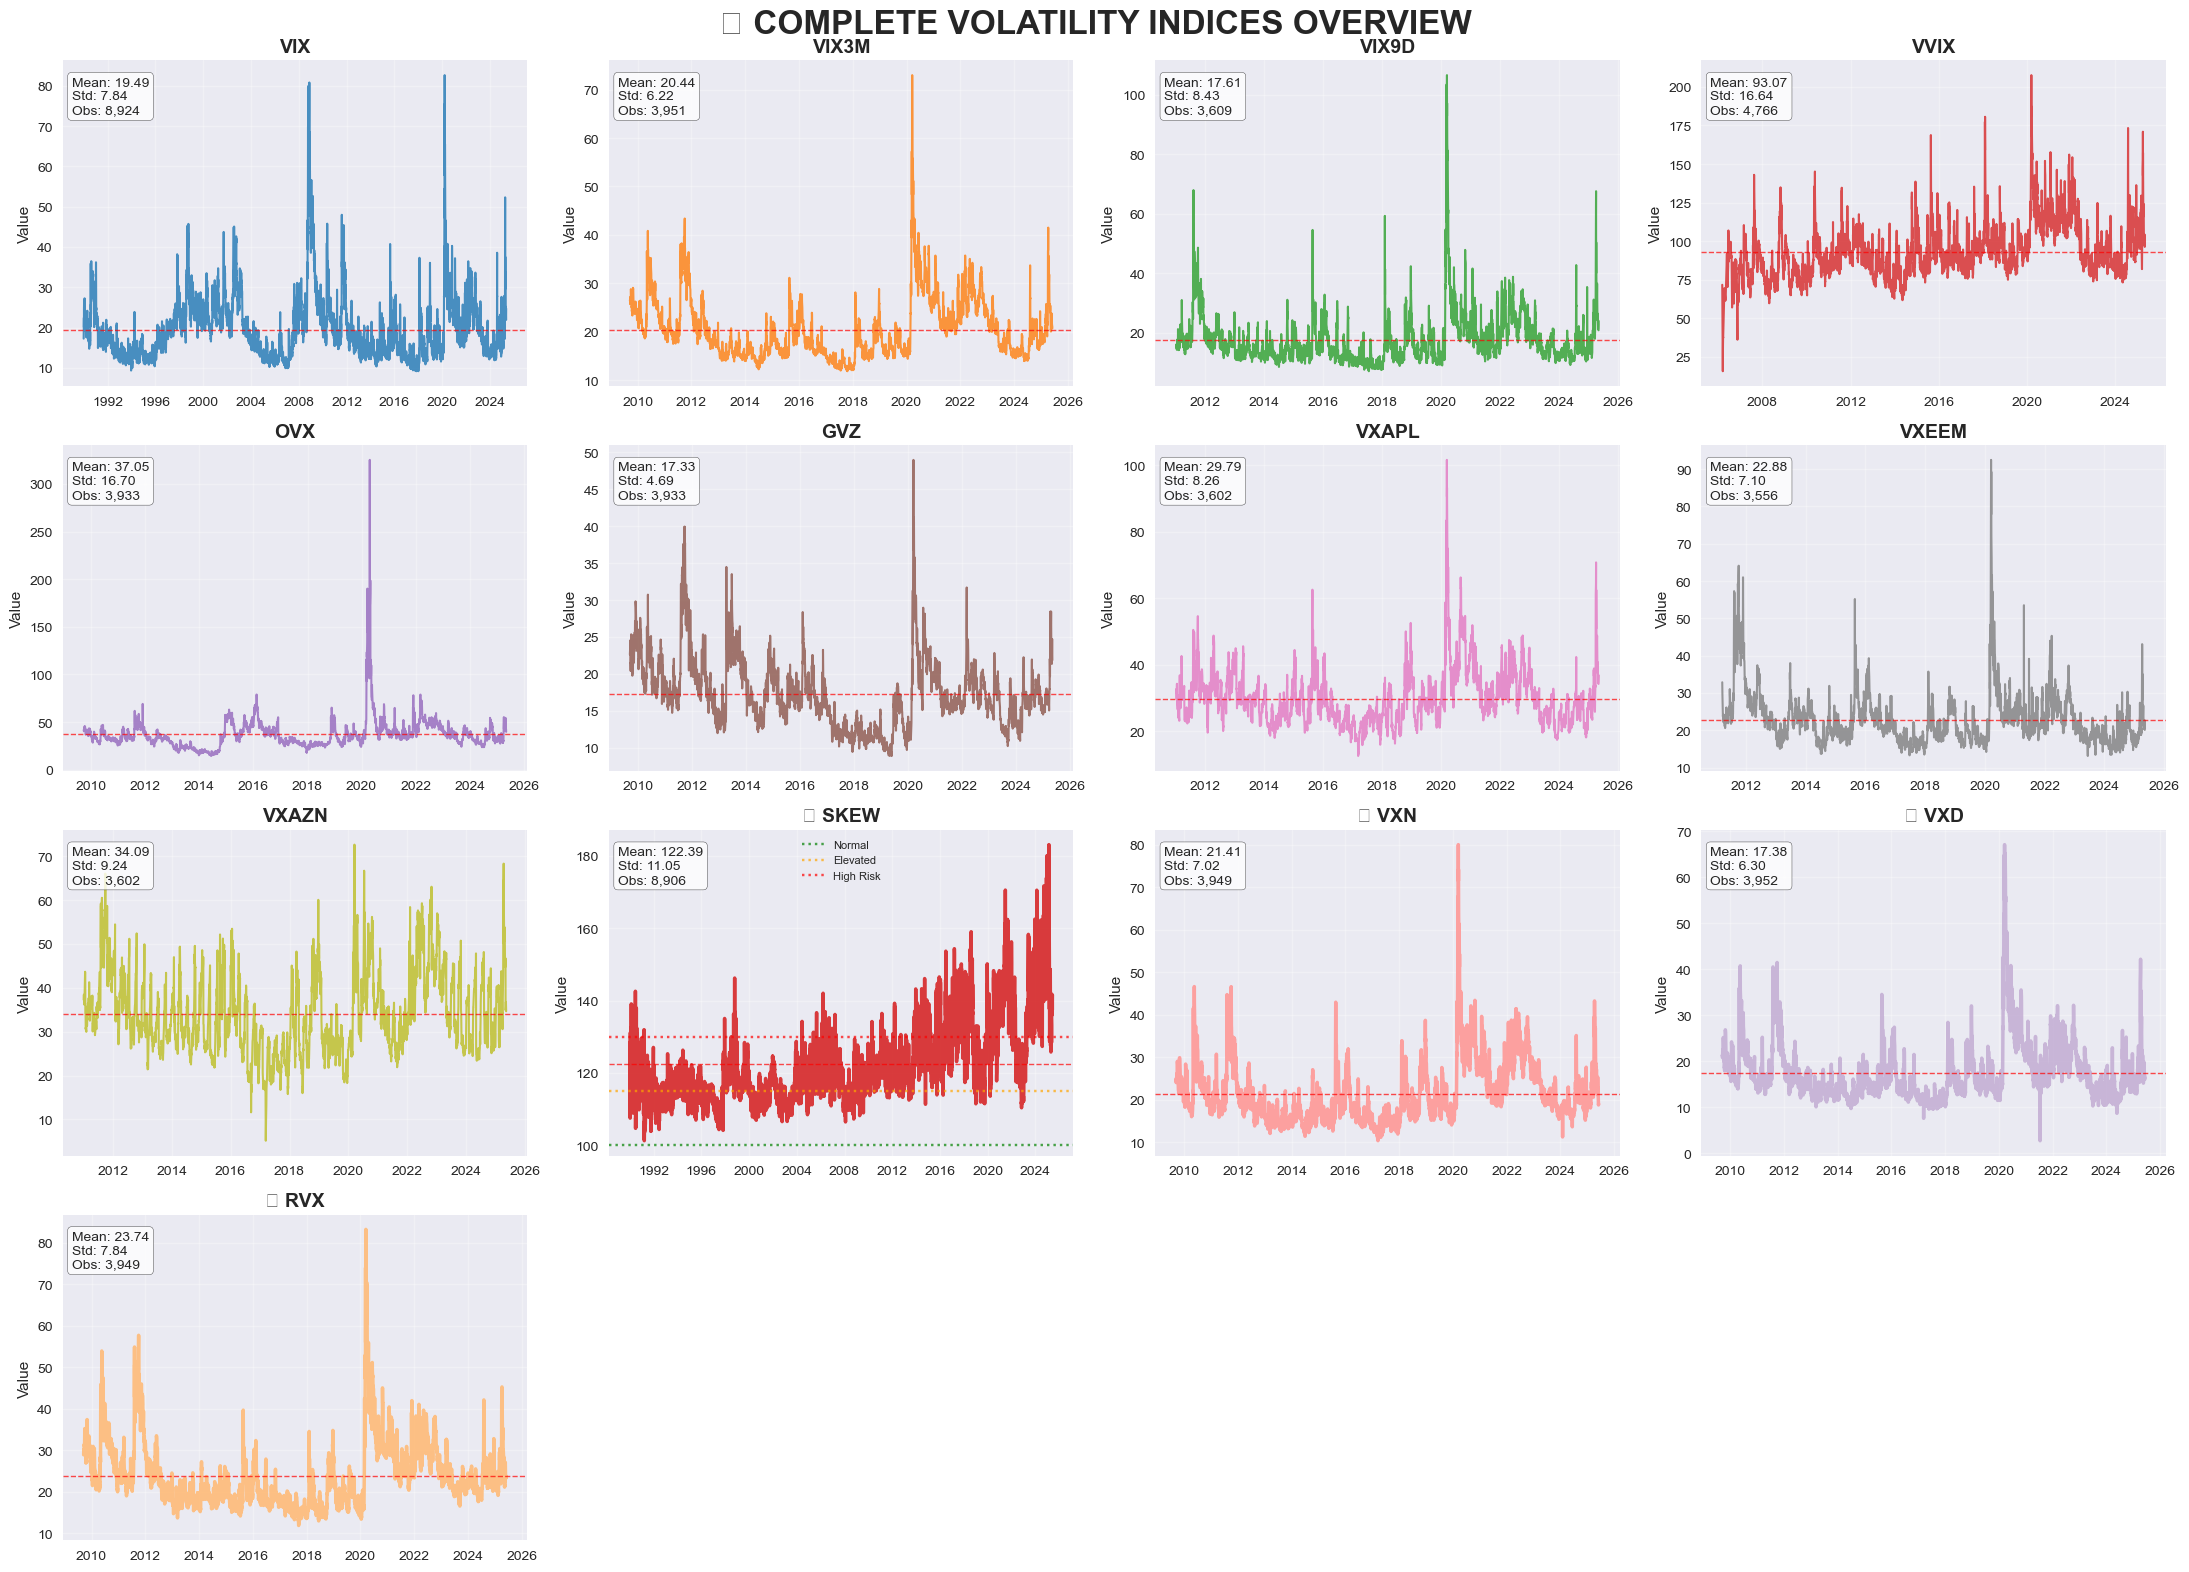


2️⃣ NEW: Regime Detection Dashboard...


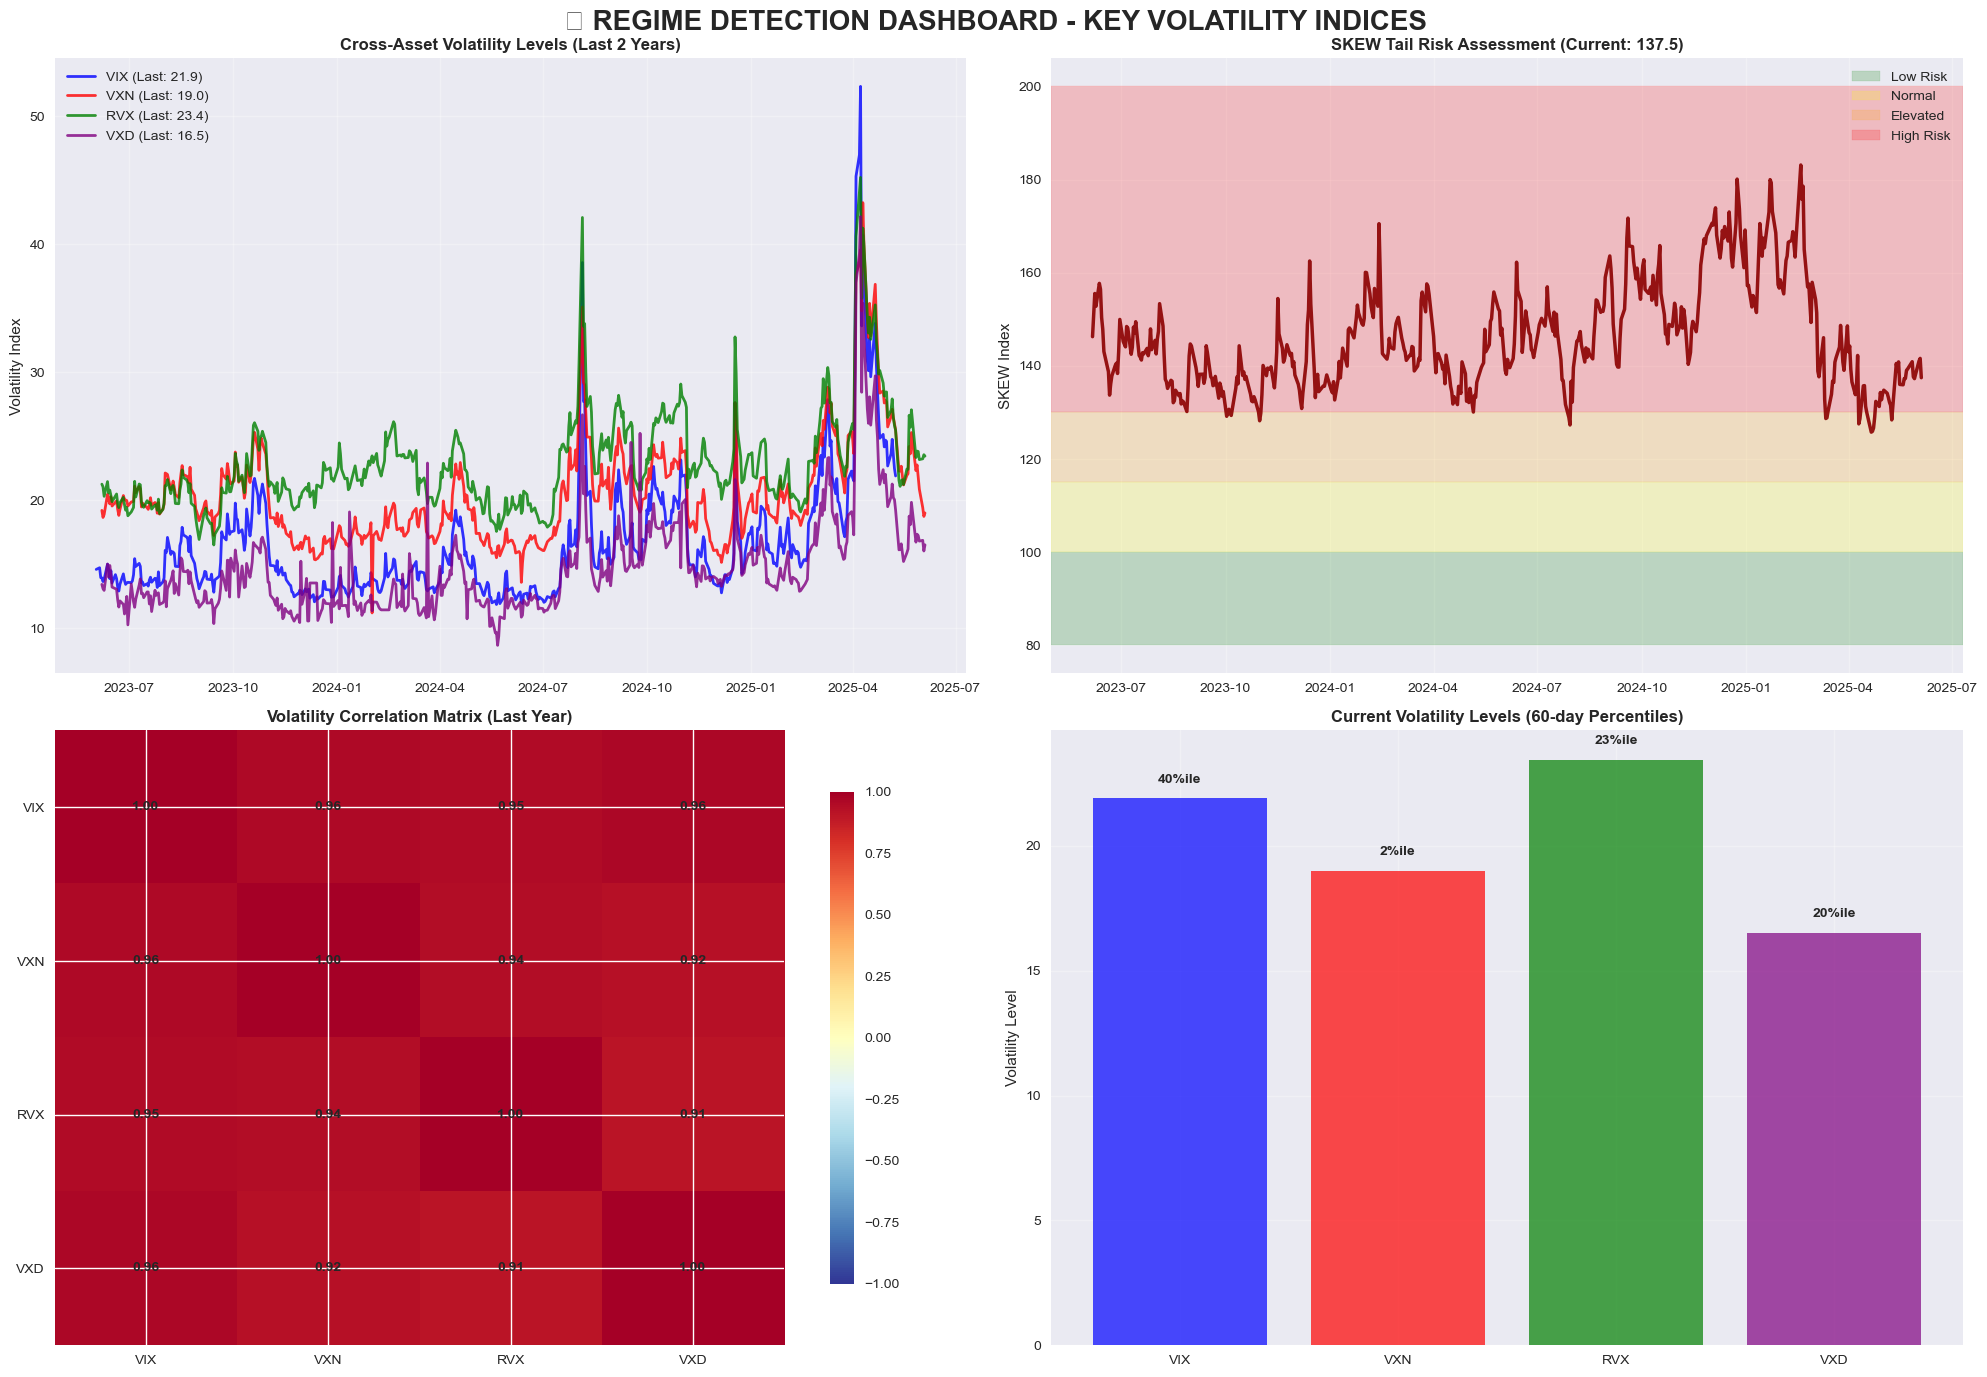


3️⃣ Market Indicators...


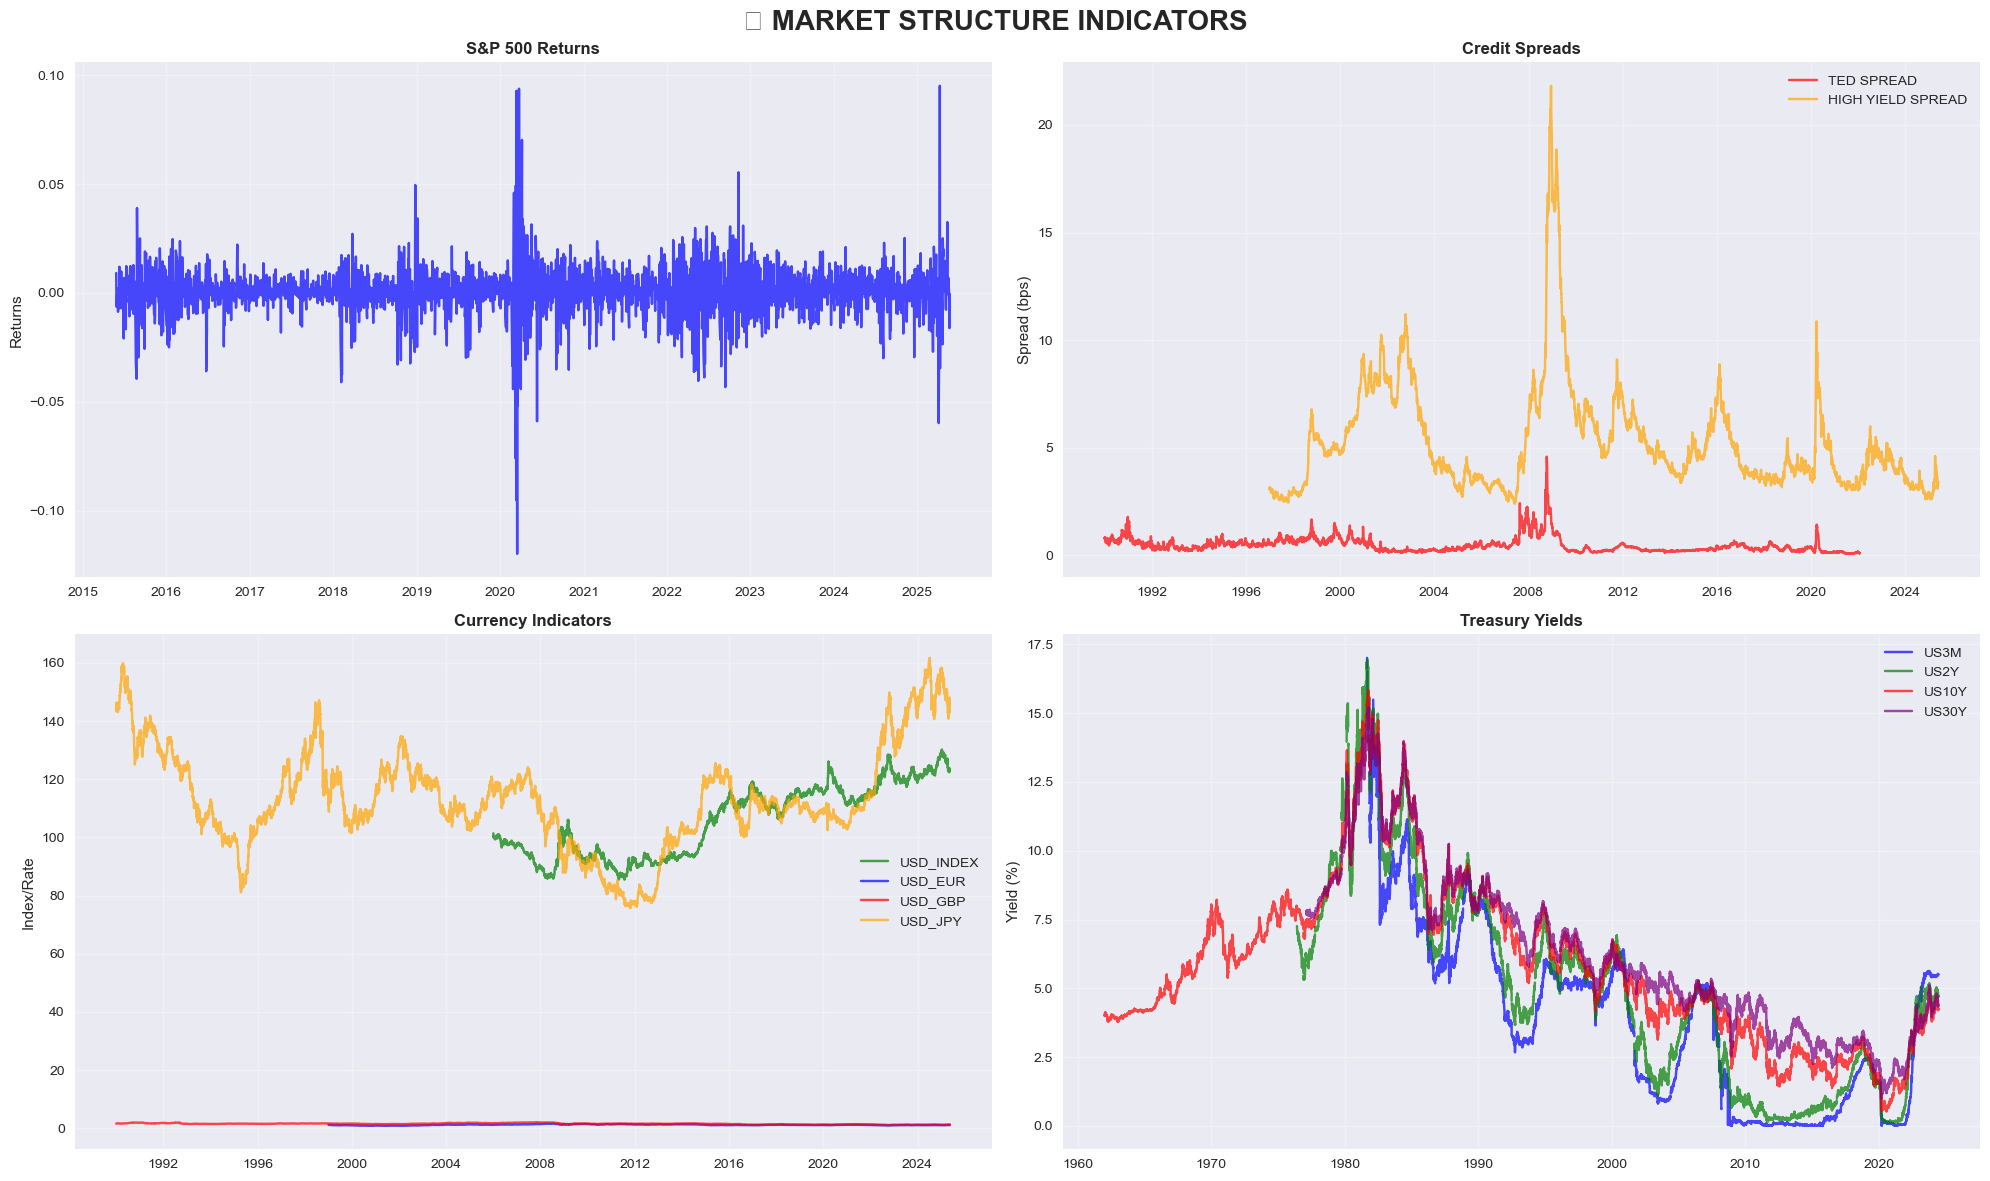


4️⃣ Macro Indicators...


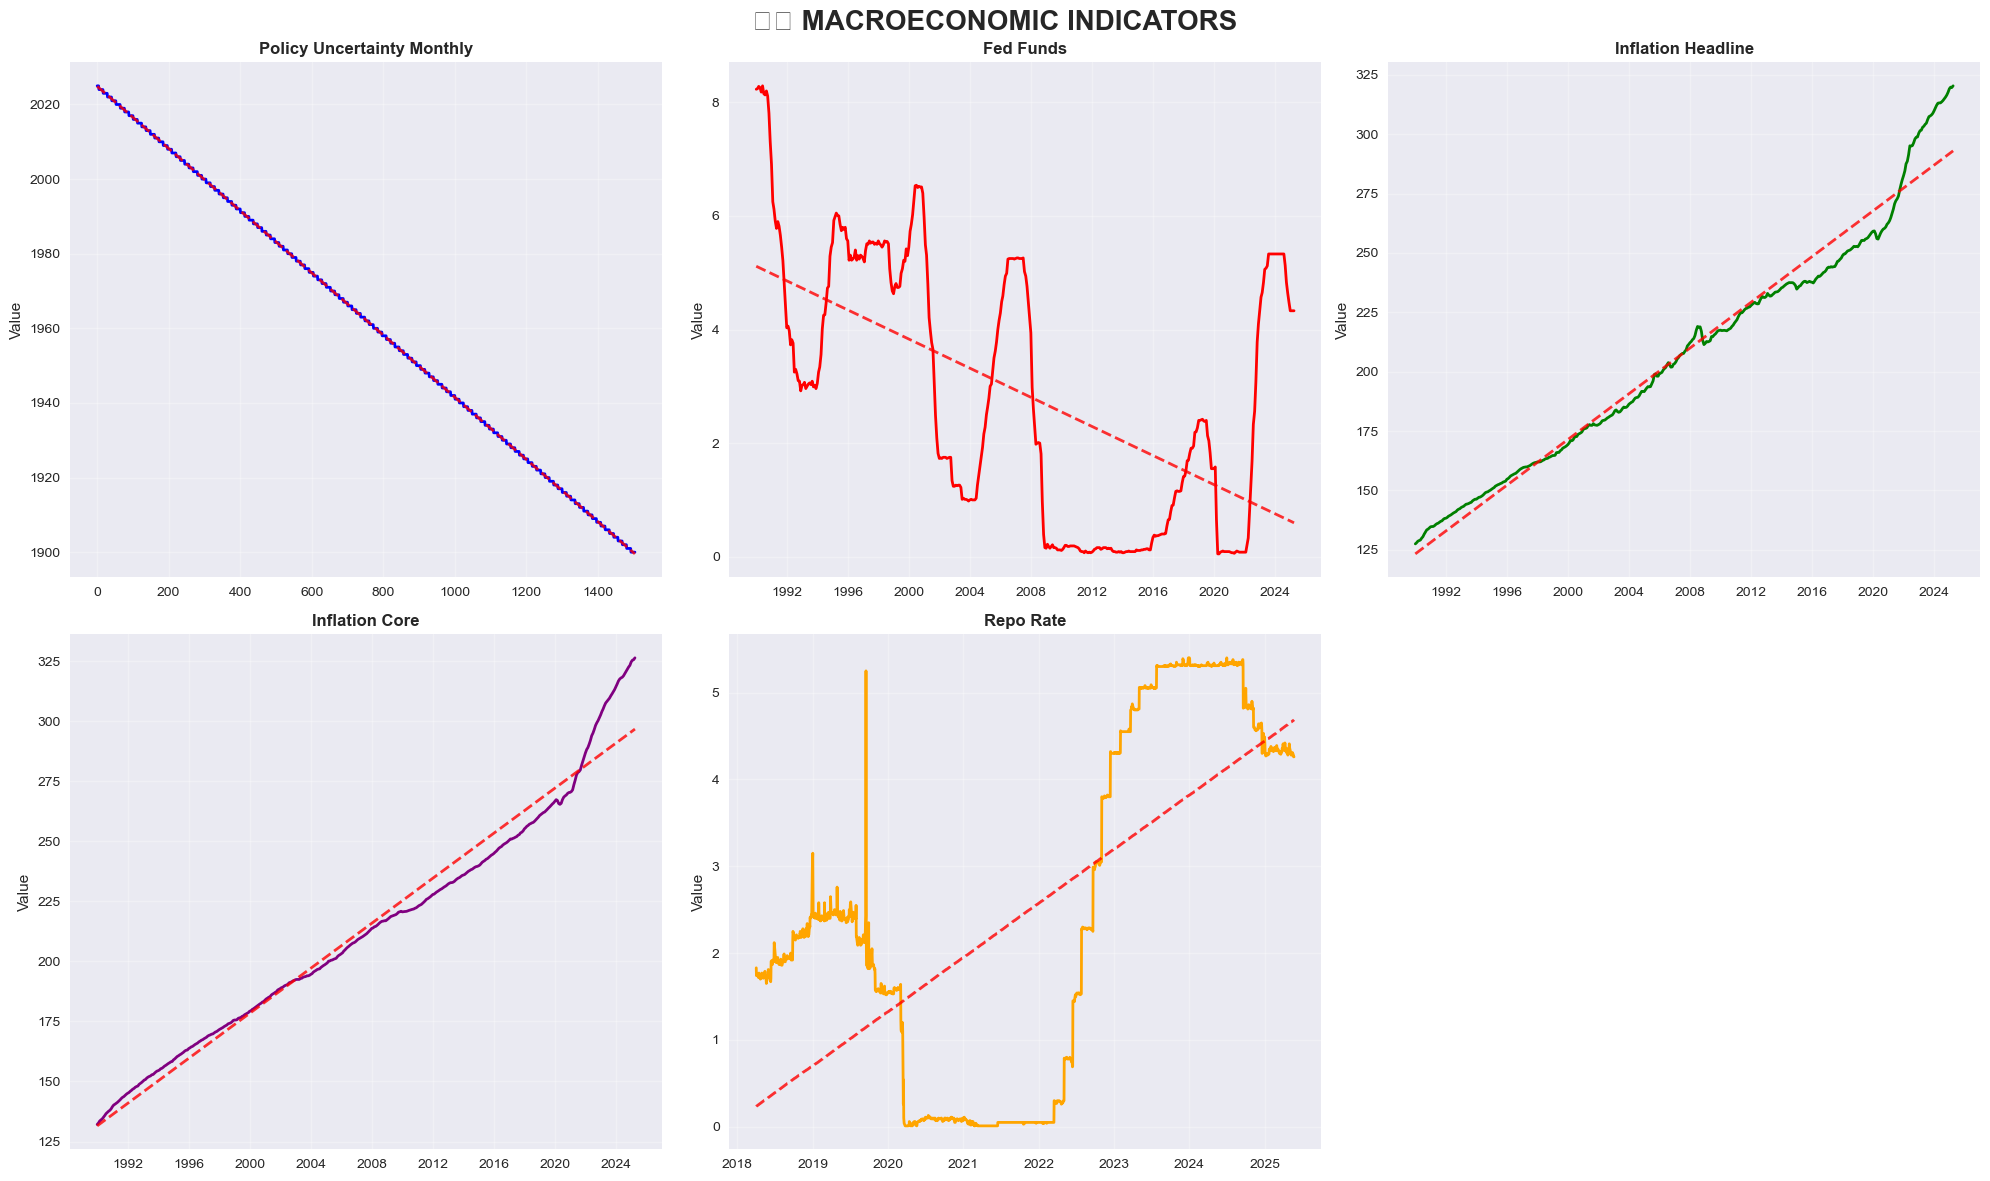


5️⃣ Events Timeline...


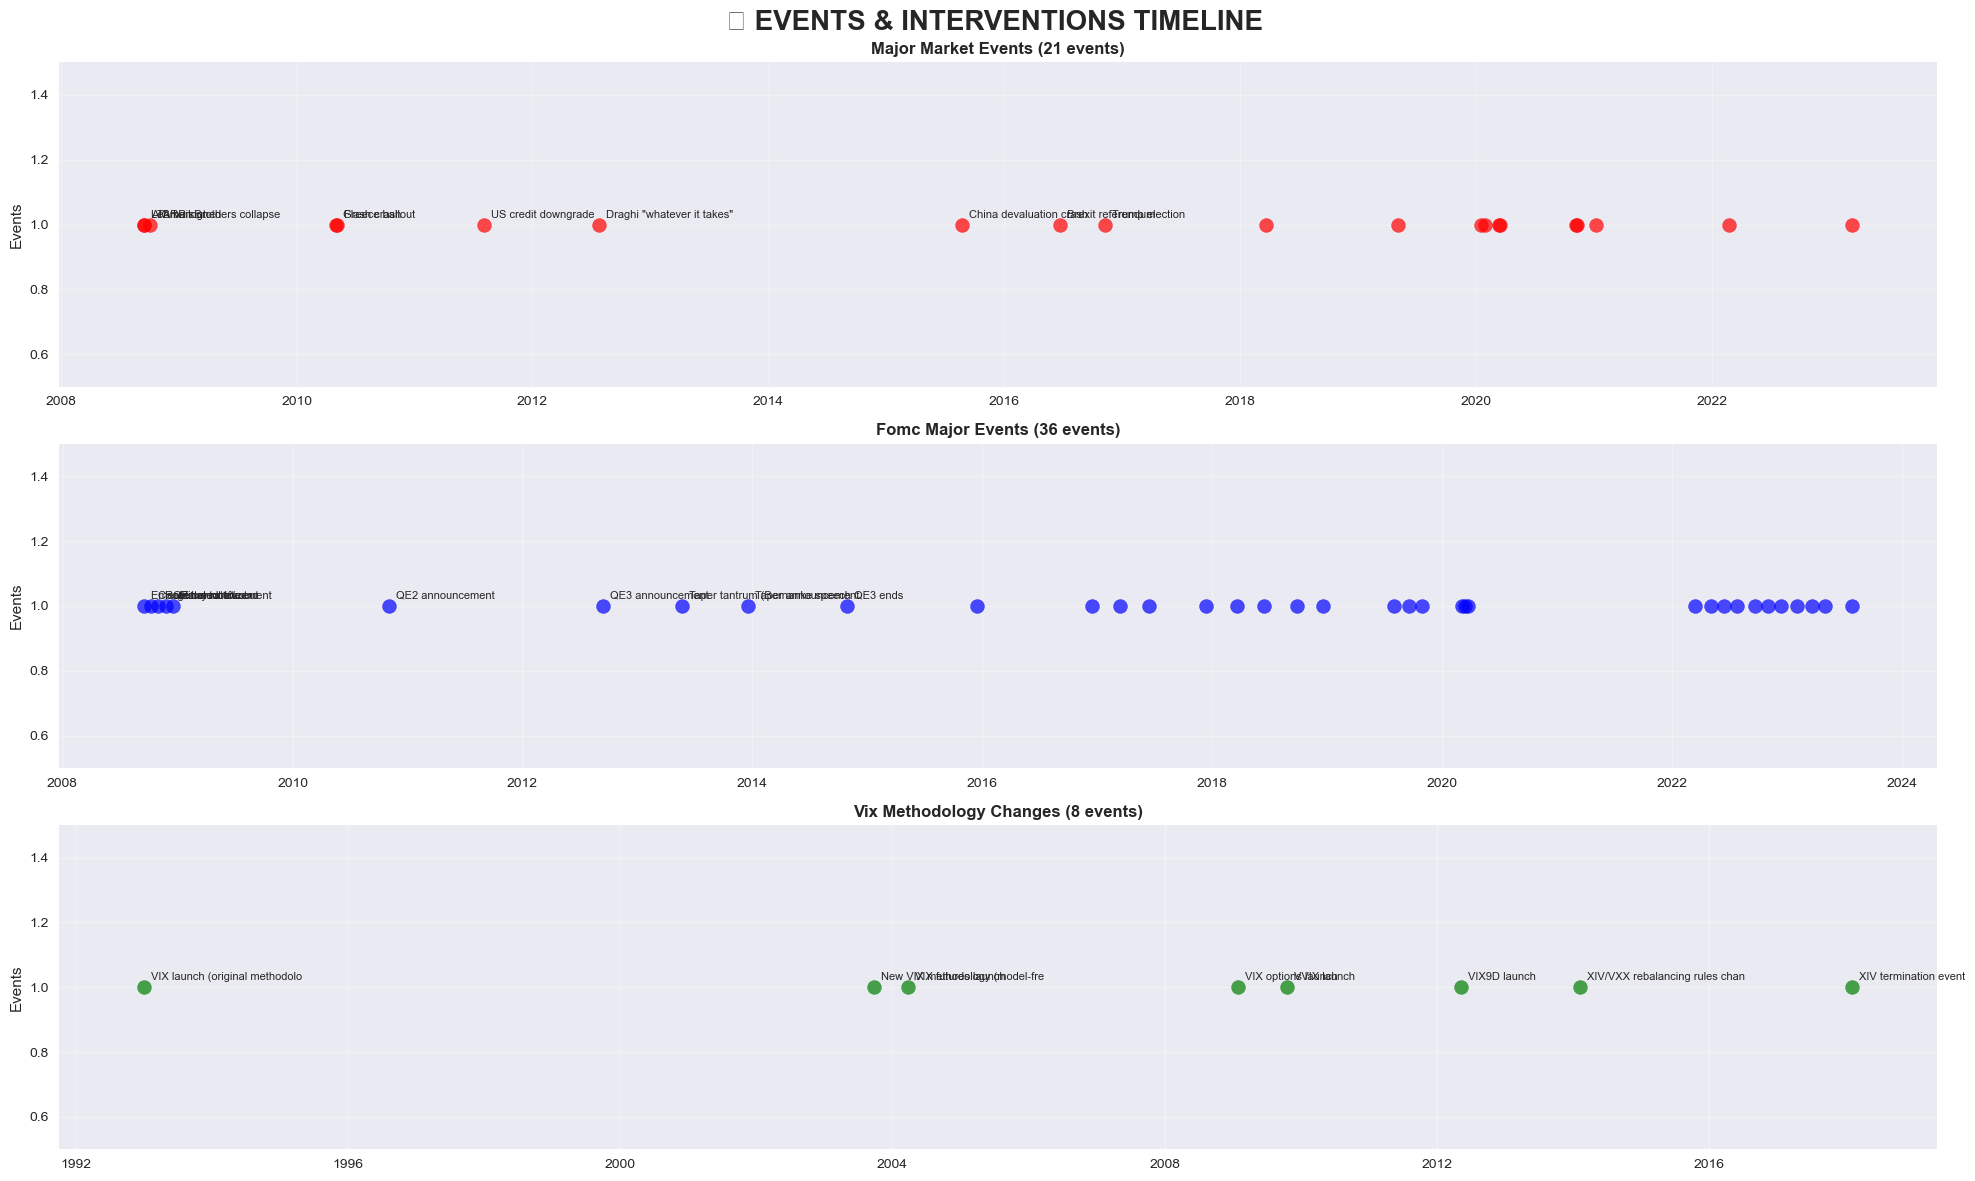


6️⃣ Enhanced Correlation Analysis...


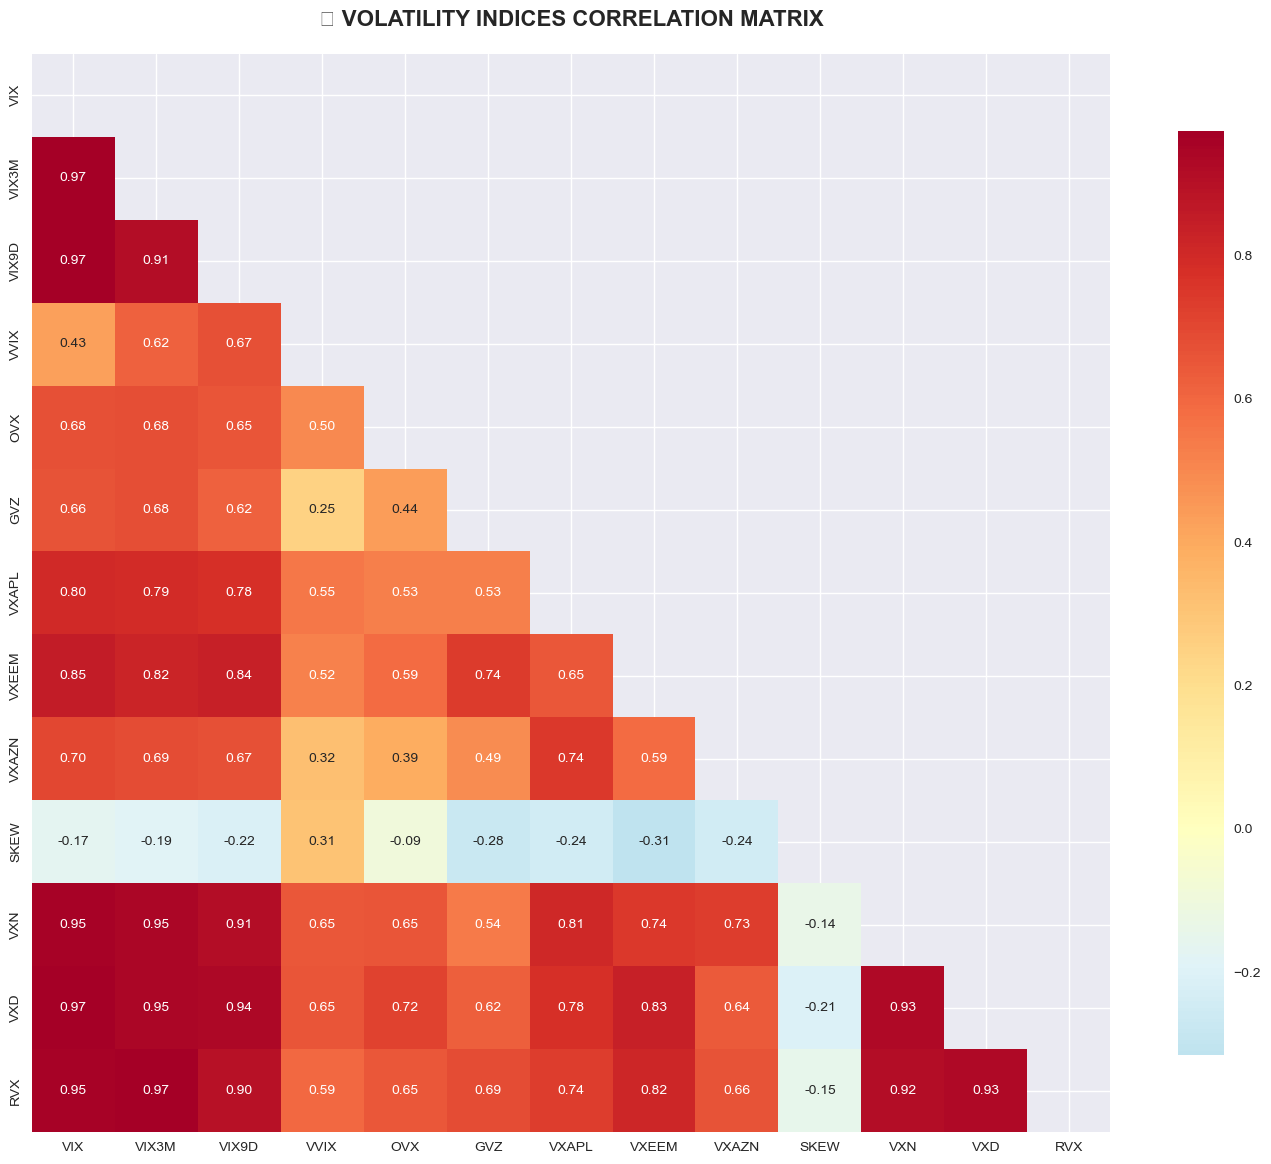


7️⃣ Data Coverage...


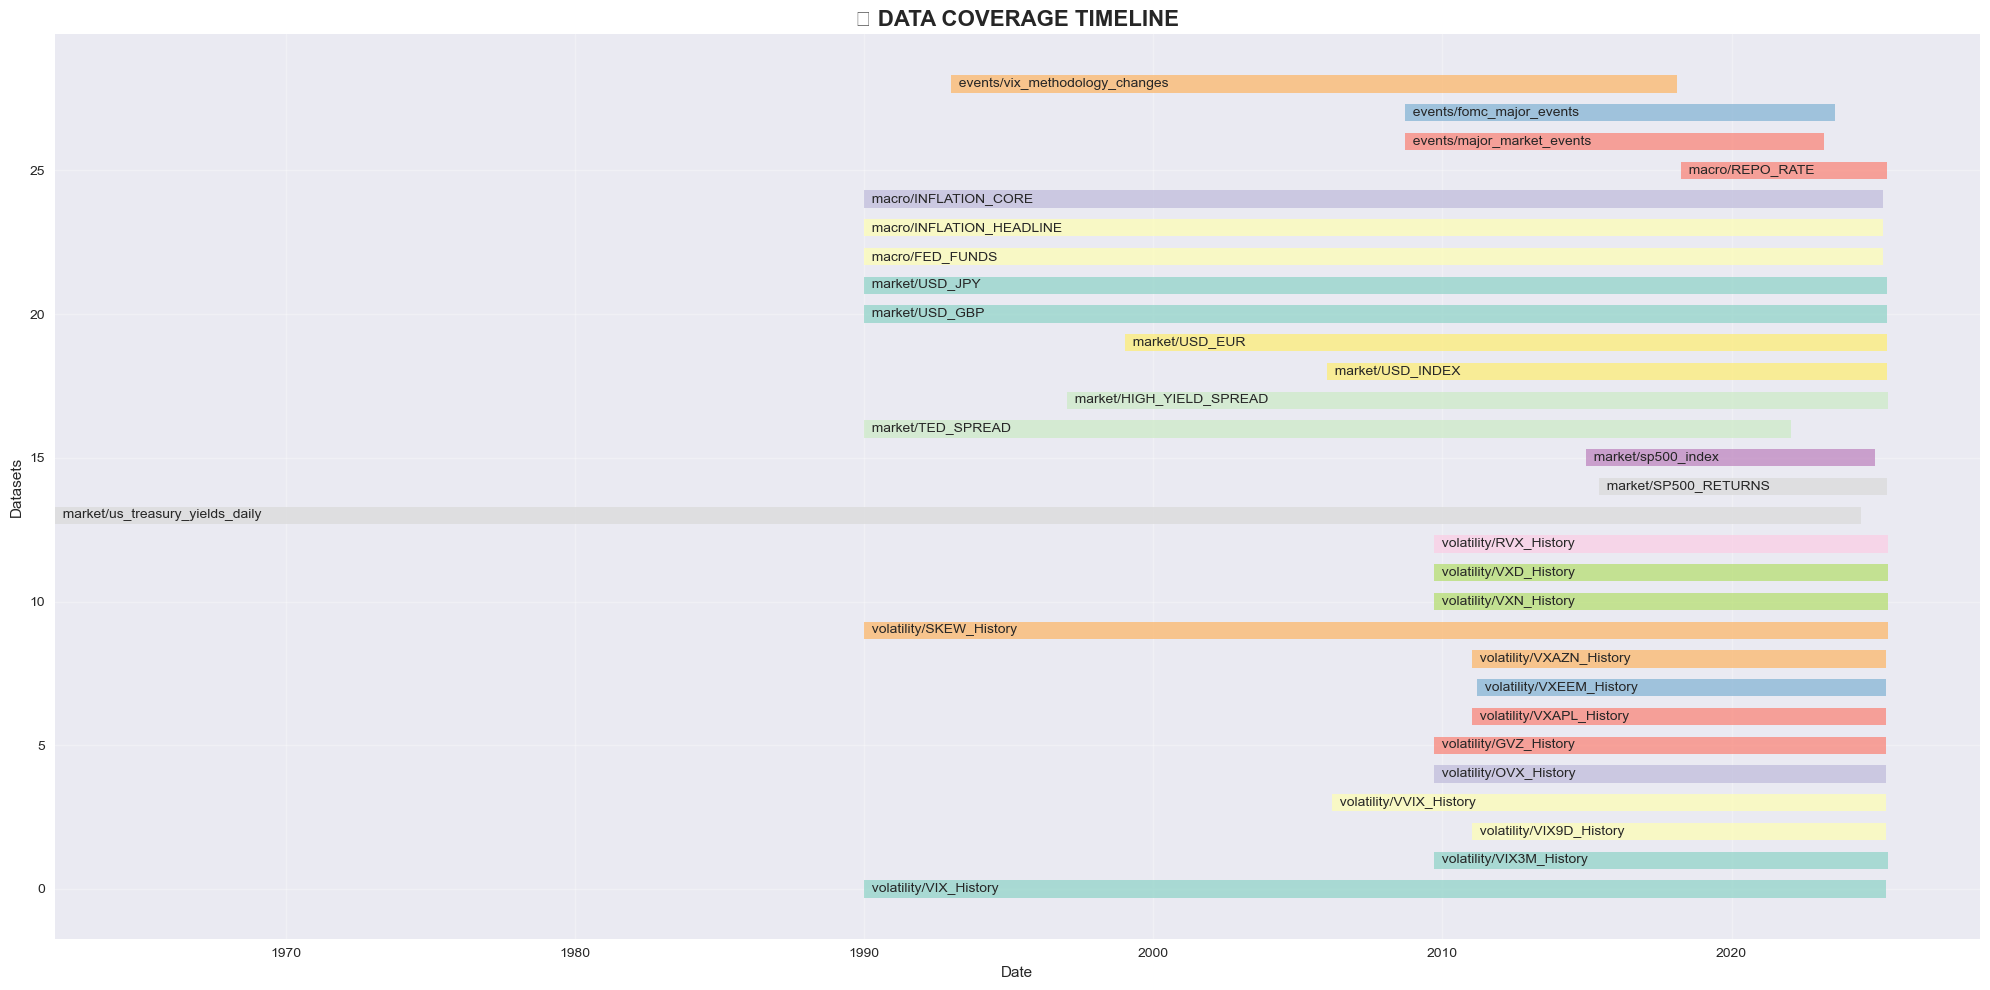


8️⃣ Summary Statistics...

📊 DATA SUMMARY STATISTICS

🔸 VOLATILITY DATA:
  📁 VIX_History:
     • Shape: (8924, 4)
     • Date range: 1990-01-02 to 2025-05-09
     • CLOSE: Mean=19.49, Std=7.84, Min=9.14, Max=82.69
  📁 VIX3M_History:
     • Shape: (3951, 4)
     • Date range: 2009-09-18 to 2025-06-03
     • CLOSE: Mean=20.44, Std=6.22, Min=11.85, Max=72.98
  📁 VIX9D_History:
     • Shape: (3609, 4)
     • Date range: 2011-01-04 to 2025-05-09
     • CLOSE: Mean=17.61, Std=8.43, Min=7.10, Max=106.66
  📁 VVIX_History:
     • Shape: (4766, 1)
     • Date range: 2006-03-06 to 2025-05-09
     • VVIX: Mean=93.07, Std=16.64, Min=15.71, Max=207.59
  📁 OVX_History:
     • Shape: (3933, 1)
     • Date range: 2009-09-18 to 2025-05-09
     • OVX: Mean=37.05, Std=16.70, Min=14.50, Max=325.15
  📁 GVZ_History:
     • Shape: (3933, 1)
     • Date range: 2009-09-18 to 2025-05-09
     • GVZ: Mean=17.33, Std=4.69, Min=8.88, Max=48.98
  📁 VXAPL_History:
     • Shape: (3602, 4)
     • Date range: 2011-01-07

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 8)

class DataVisualizer:
    def __init__(self, data_root="data"):
        self.data_root = Path(data_root)
        self.data_dict = {}
        
    def load_all_data(self):
        """Load all data files into a organized dictionary"""
        print("🔄 Loading all data files...")
        
        # Define data structure - UPDATED to include new indices
        data_structure = {
            'volatility': [
                'VIX_History.csv', 'VIX3M_History.csv', 'VIX9D_History.csv', 'VVIX_History.csv',
                'OVX_History.csv', 'GVZ_History.csv', 'VXAPL_History.csv', 'VXEEM_History.csv', 'VXAZN_History.csv',
                # NEW ADDITIONS - Add these to your volatility folder
                'SKEW_History.csv', 'VXN_History.csv', 'VXD_History.csv', 'RVX_History.csv'
            ],
            'market': [
                'us_treasury_yields_daily.csv', 'SP500_RETURNS.csv', 'sp500_index.csv',
                'TED_SPREAD.csv', 'HIGH_YIELD_SPREAD.csv', 'USD_INDEX.csv', 'USD_EUR.csv', 'USD_GBP.csv', 'USD_JPY.csv'
            ],
            'macro': [
                'policy_uncertainty_monthly.csv', 'FED_FUNDS.csv', 'INFLATION_HEADLINE.csv',
                'INFLATION_CORE.csv', 'REPO_RATE.csv'
            ],
            'events': [
                'major_market_events.csv', 'fomc_major_events.csv', 'vix_methodology_changes.csv'
            ]
        }
        
        for category, files in data_structure.items():
            self.data_dict[category] = {}
            for file in files:
                file_path = self.data_root / category / file
                if file_path.exists():
                    try:
                        # Load data
                        if file.endswith('.xlsx'):
                            df = pd.read_excel(file_path)
                        else:
                            df = pd.read_csv(file_path)
                        
                        # Try to parse date column
                        date_col = self._find_date_column(df)
                        if date_col:
                            df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
                            df = df.set_index(date_col).sort_index()
                        
                        self.data_dict[category][file.replace('.csv', '').replace('.xlsx', '')] = df
                        print(f"  ✅ Loaded {category}/{file}: {df.shape}")
                        
                    except Exception as e:
                        print(f"  ❌ Error loading {file}: {e}")
                else:
                    print(f"  ⚠️  File not found: {file}")
        
        return self.data_dict
    
    def _find_date_column(self, df):
        """Find the date column in a dataframe"""
        date_candidates = ['DATE', 'Date', 'date', 'TIME', 'Time', 'time', 'TIMESTAMP', 'timestamp']
        for col in df.columns:
            if col in date_candidates or 'date' in col.lower():
                return col
        return None
    
    def plot_volatility_overview(self):
        """Plot overview of all volatility indices - ENHANCED for new indices"""
        volatility_data = self.data_dict.get('volatility', {})
        
        # Create a larger grid to accommodate all indices
        n_indices = len(volatility_data)
        if n_indices <= 9:
            rows, cols = 3, 3
        elif n_indices <= 12:
            rows, cols = 3, 4
        else:
            rows, cols = 4, 4
            
        fig, axes = plt.subplots(rows, cols, figsize=(22, 16))
        fig.suptitle('📊 COMPLETE VOLATILITY INDICES OVERVIEW', fontsize=24, fontweight='bold', y=0.98)
        
        axes_flat = axes.flatten()
        
        # Enhanced color palette for more indices
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', 
                 '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff9896', '#c5b0d5', '#ffbb78']
        
        # Define special highlighting for key new indices
        key_indices = ['SKEW_History', 'VXN_History', 'VXD_History', 'RVX_History']
        
        for i, (name, df) in enumerate(volatility_data.items()):
            if i < len(axes_flat) and not df.empty:
                ax = axes_flat[i]
                
                # Get the main value column
                value_col = self._get_main_value_column(df, name)
                
                if value_col and value_col in df.columns:
                    # Special styling for new key indices
                    if name in key_indices:
                        linewidth = 2.5
                        alpha = 0.9
                        color = '#d62728' if name == 'SKEW_History' else colors[i % len(colors)]
                    else:
                        linewidth = 1.5
                        alpha = 0.8
                        color = colors[i % len(colors)]
                    
                    # Plot main time series
                    ax.plot(df.index, df[value_col], color=color, linewidth=linewidth, alpha=alpha)
                    
                    # Enhanced title for key indices
                    title = name.replace('_History', '').upper()
                    if name in key_indices:
                        title = f'🆕 {title}'  # Mark new additions
                    
                    ax.set_title(title, fontsize=14, fontweight='bold')
                    ax.set_ylabel('Value')
                    ax.grid(True, alpha=0.3)
                    
                    # Add summary statistics
                    mean_val = df[value_col].mean()
                    std_val = df[value_col].std()
                    ax.axhline(mean_val, color='red', linestyle='--', alpha=0.7, linewidth=1)
                    
                    # Special regime lines for SKEW
                    if name == 'SKEW_History':
                        ax.axhline(100, color='green', linestyle=':', alpha=0.7, label='Normal')
                        ax.axhline(115, color='orange', linestyle=':', alpha=0.7, label='Elevated')
                        ax.axhline(130, color='red', linestyle=':', alpha=0.7, label='High Risk')
                        ax.legend(fontsize=8)
                    
                    # Add text with stats
                    ax.text(0.02, 0.95, f'Mean: {mean_val:.2f}\nStd: {std_val:.2f}\nObs: {len(df):,}', 
                           transform=ax.transAxes, verticalalignment='top', 
                           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # Hide empty subplots
        for i in range(len(volatility_data), len(axes_flat)):
            axes_flat[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    
    def plot_regime_detection_dashboard(self):
        """NEW: Special dashboard for regime detection using key volatility indices"""
        volatility_data = self.data_dict.get('volatility', {})
        
        # Get the key regime detection indices
        key_data = {}
        for key in ['VIX_History', 'VXN_History', 'RVX_History', 'VXD_History', 'SKEW_History']:
            if key in volatility_data and not volatility_data[key].empty:
                df = volatility_data[key]
                value_col = self._get_main_value_column(df, key)
                if value_col:
                    key_data[key.replace('_History', '')] = df[value_col]
        
        if len(key_data) >= 3:  # Need at least 3 indices
            fig, axes = plt.subplots(2, 2, figsize=(20, 14))
            fig.suptitle('🎯 REGIME DETECTION DASHBOARD - KEY VOLATILITY INDICES', 
                        fontsize=20, fontweight='bold', y=0.98)
            
            # 1. Cross-Asset Volatility Comparison
            ax1 = axes[0, 0]
            colors = ['blue', 'red', 'green', 'purple']
            index_names = ['VIX', 'VXN', 'RVX', 'VXD']
            
            for i, (name, color) in enumerate(zip(index_names, colors)):
                if name in key_data:
                    # Plot last 2 years for clarity
                    recent_data = key_data[name].iloc[-500:]
                    ax1.plot(recent_data.index, recent_data.values, 
                            label=f'{name} (Last: {recent_data.iloc[-1]:.1f})', 
                            color=color, linewidth=2, alpha=0.8)
            
            ax1.set_title('Cross-Asset Volatility Levels (Last 2 Years)', fontweight='bold')
            ax1.set_ylabel('Volatility Index')
            ax1.legend()
            ax1.grid(True, alpha=0.3)
            
            # 2. SKEW Risk Assessment
            ax2 = axes[0, 1]
            if 'SKEW' in key_data:
                skew_recent = key_data['SKEW'].iloc[-500:]
                ax2.plot(skew_recent.index, skew_recent.values, 
                        color='darkred', linewidth=2.5, alpha=0.9)
                
                # Add regime zones
                ax2.axhspan(80, 100, alpha=0.2, color='green', label='Low Risk')
                ax2.axhspan(100, 115, alpha=0.2, color='yellow', label='Normal')
                ax2.axhspan(115, 130, alpha=0.2, color='orange', label='Elevated')
                ax2.axhspan(130, 200, alpha=0.2, color='red', label='High Risk')
                
                current_skew = skew_recent.iloc[-1]
                ax2.set_title(f'SKEW Tail Risk Assessment (Current: {current_skew:.1f})', fontweight='bold')
                ax2.set_ylabel('SKEW Index')
                ax2.legend()
                ax2.grid(True, alpha=0.3)
            
            # 3. Volatility Correlation Matrix
            ax3 = axes[1, 0]
            if len(key_data) >= 3:
                # Calculate correlation matrix for recent period
                recent_combined = pd.DataFrame({k: v.iloc[-252:] for k, v in key_data.items() if k != 'SKEW'})
                if len(recent_combined.columns) > 1:
                    corr_matrix = recent_combined.corr()
                    
                    im = ax3.imshow(corr_matrix.values, cmap='RdYlBu_r', aspect='auto', vmin=-1, vmax=1)
                    ax3.set_xticks(range(len(corr_matrix.columns)))
                    ax3.set_yticks(range(len(corr_matrix.columns)))
                    ax3.set_xticklabels(corr_matrix.columns)
                    ax3.set_yticklabels(corr_matrix.columns)
                    
                    # Add correlation values
                    for i in range(len(corr_matrix.columns)):
                        for j in range(len(corr_matrix.columns)):
                            ax3.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', 
                                   ha='center', va='center', fontweight='bold')
                    
                    ax3.set_title('Volatility Correlation Matrix (Last Year)', fontweight='bold')
                    plt.colorbar(im, ax=ax3, shrink=0.8)
            
            # 4. Current Regime Classification
            ax4 = axes[1, 1]
            if len(key_data) >= 3:
                # Calculate regime indicators
                recent_period = -60  # Last 60 days
                regime_data = []
                
                for name in ['VIX', 'VXN', 'RVX', 'VXD']:
                    if name in key_data:
                        recent = key_data[name].iloc[recent_period:]
                        if len(recent) > 0:
                            regime_data.append({
                                'Index': name,
                                'Current': recent.iloc[-1],
                                'Mean_60d': recent.mean(),
                                'Std_60d': recent.std(),
                                'Percentile': (recent.iloc[-1] > recent).mean() * 100
                            })
                
                if regime_data:
                    regime_df = pd.DataFrame(regime_data)
                    
                    # Create bar plot
                    x_pos = range(len(regime_df))
                    bars = ax4.bar(x_pos, regime_df['Current'], 
                                  color=['blue', 'red', 'green', 'purple'][:len(regime_df)], alpha=0.7)
                    
                    # Add percentile labels
                    for i, (bar, row) in enumerate(zip(bars, regime_df.itertuples())):
                        height = bar.get_height()
                        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                               f'{row.Percentile:.0f}%ile', 
                               ha='center', va='bottom', fontweight='bold')
                    
                    ax4.set_xticks(x_pos)
                    ax4.set_xticklabels(regime_df['Index'])
                    ax4.set_title('Current Volatility Levels (60-day Percentiles)', fontweight='bold')
                    ax4.set_ylabel('Volatility Level')
                    ax4.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
        else:
            print("⚠️  Need at least 3 key volatility indices for regime detection dashboard")
    
    # [Keep all other original methods exactly the same...]
    def plot_market_indicators(self):
        """Plot market structure indicators"""
        market_data = self.data_dict.get('market', {})
        
        # Create subplots for different categories
        fig, axes = plt.subplots(2, 2, figsize=(20, 12))
        fig.suptitle('📈 MARKET STRUCTURE INDICATORS', fontsize=20, fontweight='bold', y=0.98)
        
        # 1. Equity Indices
        ax1 = axes[0, 0]
        if 'SP500_RETURNS' in market_data and not market_data['SP500_RETURNS'].empty:
            df = market_data['SP500_RETURNS']
            value_col = self._get_main_value_column(df, 'SP500_RETURNS')
            if value_col:
                ax1.plot(df.index, df[value_col], color='blue', alpha=0.7)
                ax1.set_title('S&P 500 Returns', fontweight='bold')
                ax1.set_ylabel('Returns')
                ax1.grid(True, alpha=0.3)
        
        # 2. Credit Spreads
        ax2 = axes[0, 1]
        spread_data = {k: v for k, v in market_data.items() if 'SPREAD' in k}
        colors = ['red', 'orange', 'purple']
        for i, (name, df) in enumerate(spread_data.items()):
            if not df.empty:
                value_col = self._get_main_value_column(df, name)
                if value_col:
                    ax2.plot(df.index, df[value_col], 
                            label=name.replace('_', ' '), 
                            color=colors[i % len(colors)], alpha=0.7)
        ax2.set_title('Credit Spreads', fontweight='bold')
        ax2.set_ylabel('Spread (bps)')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # 3. Currency Indices
        ax3 = axes[1, 0]
        currency_data = {k: v for k, v in market_data.items() if 'USD' in k}
        colors = ['green', 'blue', 'red', 'orange']
        for i, (name, df) in enumerate(currency_data.items()):
            if not df.empty:
                value_col = self._get_main_value_column(df, name)
                if value_col:
                    ax3.plot(df.index, df[value_col], 
                            label=name, color=colors[i % len(colors)], alpha=0.7)
        ax3.set_title('Currency Indicators', fontweight='bold')
        ax3.set_ylabel('Index/Rate')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # 4. Treasury Yields (if available)
        ax4 = axes[1, 1]
        if 'us_treasury_yields_daily' in market_data and not market_data['us_treasury_yields_daily'].empty:
            df = market_data['us_treasury_yields_daily']
            # Plot a few key yields
            yield_cols = [col for col in df.columns if any(term in col.upper() for term in ['3M', '2Y', '10Y', '30Y'])][:4]
            colors = ['blue', 'green', 'red', 'purple']
            for i, col in enumerate(yield_cols):
                if col in df.columns:
                    ax4.plot(df.index, df[col], label=col, color=colors[i % len(colors)], alpha=0.7)
            ax4.set_title('Treasury Yields', fontweight='bold')
            ax4.set_ylabel('Yield (%)')
            ax4.legend()
            ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def plot_macro_indicators(self):
        """Plot macroeconomic indicators"""
        macro_data = self.data_dict.get('macro', {})
        
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        fig.suptitle('🏛️ MACROECONOMIC INDICATORS', fontsize=20, fontweight='bold', y=0.98)
        
        axes_flat = axes.flatten()
        colors = ['blue', 'red', 'green', 'purple', 'orange']
        
        for i, (name, df) in enumerate(macro_data.items()):
            if i < len(axes_flat) and not df.empty:
                ax = axes_flat[i]
                value_col = self._get_main_value_column(df, name)
                
                if value_col:
                    ax.plot(df.index, df[value_col], color=colors[i % len(colors)], linewidth=2)
                    ax.set_title(name.replace('_', ' ').title(), fontweight='bold')
                    ax.set_ylabel('Value')
                    ax.grid(True, alpha=0.3)
                    
                    # Add trend line
                    if len(df) > 100:
                        z = np.polyfit(range(len(df)), df[value_col].fillna(method='ffill'), 1)
                        p = np.poly1d(z)
                        ax.plot(df.index, p(range(len(df))), "--", color='red', alpha=0.8, linewidth=2)
        
        # Hide empty subplots
        for i in range(len(macro_data), len(axes_flat)):
            axes_flat[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    
    def plot_events_timeline(self):
        """Plot event data and timelines"""
        events_data = self.data_dict.get('events', {})
        
        fig, axes = plt.subplots(len(events_data), 1, figsize=(20, 4*len(events_data)))
        if len(events_data) == 1:
            axes = [axes]
        
        fig.suptitle('📅 EVENTS & INTERVENTIONS TIMELINE', fontsize=20, fontweight='bold', y=0.98)
        
        colors = ['red', 'blue', 'green']
        
        for i, (name, df) in enumerate(events_data.items()):
            if not df.empty:
                ax = axes[i]
                
                # If this is event data with dates, create timeline
                if hasattr(df.index, 'year'):  # Has datetime index
                    # Create scatter plot of events
                    y_vals = [1] * len(df)
                    ax.scatter(df.index, y_vals, color=colors[i % len(colors)], s=100, alpha=0.7)
                    
                    # Add event labels if there's a description column
                    desc_cols = [col for col in df.columns if any(word in col.lower() for word in ['event', 'description', 'type'])]
                    if desc_cols:
                        for j, (date, row) in enumerate(df.iterrows()):
                            if j < 10:  # Limit to first 10 events to avoid clutter
                                ax.annotate(str(row[desc_cols[0]])[:30], 
                                          (date, 1), xytext=(5, 5), 
                                          textcoords='offset points', fontsize=8)
                    
                    ax.set_ylim(0.5, 1.5)
                    ax.set_title(f'{name.replace("_", " ").title()} ({len(df)} events)', fontweight='bold')
                    ax.set_ylabel('Events')
                    ax.grid(True, alpha=0.3)
                else:
                    # If no datetime index, just show the data structure
                    ax.text(0.5, 0.5, f'{name}: {df.shape[0]} rows, {df.shape[1]} columns\nColumns: {list(df.columns)[:5]}', 
                           transform=ax.transAxes, ha='center', va='center', fontsize=12)
                    ax.set_title(f'{name.replace("_", " ").title()}', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    def plot_correlation_heatmap(self):
        """Plot correlation heatmap of key volatility indices"""
        volatility_data = self.data_dict.get('volatility', {})
        
        # Collect main volatility series
        vol_series = {}
        for name, df in volatility_data.items():
            if not df.empty:
                value_col = self._get_main_value_column(df, name)
                if value_col:
                    clean_name = name.replace('_History', '').upper()
                    vol_series[clean_name] = df[value_col]
        
        if len(vol_series) > 1:
            # Combine into a single dataframe
            combined_df = pd.DataFrame(vol_series)
            
            # Calculate correlation matrix
            corr_matrix = combined_df.corr()
            
            # Plot heatmap
            plt.figure(figsize=(14, 12))
            mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
            sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlBu_r', 
                       center=0, square=True, fmt='.2f', cbar_kws={"shrink": .8})
            plt.title('🔥 VOLATILITY INDICES CORRELATION MATRIX', fontsize=16, fontweight='bold', pad=20)
            plt.tight_layout()
            plt.show()
    
    def plot_data_coverage(self):
        """Plot data coverage timeline"""
        fig, ax = plt.subplots(figsize=(20, 10))
        
        # Collect all datasets with date ranges
        datasets = []
        colors = plt.cm.Set3(np.linspace(0, 1, 20))
        
        y_pos = 0
        for category, data_dict in self.data_dict.items():
            for name, df in data_dict.items():
                if not df.empty and hasattr(df.index, 'min'):
                    try:
                        start_date = df.index.min()
                        end_date = df.index.max()
                        
                        # Ensure we have datetime objects
                        if hasattr(start_date, 'date') and hasattr(end_date, 'date'):
                            # Calculate duration in days
                            duration = (end_date - start_date)
                            if hasattr(duration, 'days'):
                                duration_days = duration.days
                            else:
                                # If duration is already a number, use it directly
                                duration_days = float(duration)
                            
                            # Plot horizontal bar for date range
                            ax.barh(y_pos, duration_days, 
                                left=start_date, height=0.6, 
                                color=colors[y_pos % len(colors)], alpha=0.7)
                            
                            # Add label
                            ax.text(start_date, y_pos, f'  {category}/{name}', 
                                va='center', fontsize=10)
                            
                            y_pos += 1
                            
                    except Exception as e:
                        print(f"  ⚠️  Skipping {category}/{name} in coverage plot: {e}")
                        continue
        
        if y_pos > 0:  # Only show plot if we have data
            ax.set_xlabel('Date')
            ax.set_ylabel('Datasets')
            ax.set_title('📊 DATA COVERAGE TIMELINE', fontsize=16, fontweight='bold')
            ax.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
        else:
            print("  ⚠️  No valid date ranges found for coverage plot")
    
    def _get_main_value_column(self, df, dataset_name):
        """Get the main value column for a dataset"""
        # Common value column names
        value_candidates = ['CLOSE', 'Close', 'close', 'VALUE', 'Value', 'value', 
                          dataset_name, dataset_name.upper(), dataset_name.lower()]
        
        # Try exact matches first
        for candidate in value_candidates:
            if candidate in df.columns:
                return candidate
        
        # If no exact match, get first numeric column
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) > 0:
            return numeric_cols[0]
        
        # Last resort: get any column except date-like ones
        non_date_cols = [col for col in df.columns if not any(date_word in col.lower() for date_word in ['date', 'time'])]
        if non_date_cols:
            return non_date_cols[0]
        
        return None
    
    def generate_summary_statistics(self):
        """Generate and display summary statistics"""
        print("\n" + "="*80)
        print("📊 DATA SUMMARY STATISTICS")
        print("="*80)
        
        for category, data_dict in self.data_dict.items():
            print(f"\n🔸 {category.upper()} DATA:")
            for name, df in data_dict.items():
                if not df.empty:
                    print(f"  📁 {name}:")
                    print(f"     • Shape: {df.shape}")
                    
                    # Check if index has datetime information
                    if hasattr(df.index, 'min'):
                        try:
                            min_idx = df.index.min()
                            max_idx = df.index.max()
                            
                            # Check if these are datetime objects
                            if hasattr(min_idx, 'date') and hasattr(max_idx, 'date'):
                                print(f"     • Date range: {min_idx.date()} to {max_idx.date()}")
                            elif hasattr(min_idx, 'strftime') and hasattr(max_idx, 'strftime'):
                                # Alternative datetime format
                                print(f"     • Date range: {min_idx.strftime('%Y-%m-%d')} to {max_idx.strftime('%Y-%m-%d')}")
                            else:
                                # Not datetime - show as index range
                                print(f"     • Index range: {min_idx} to {max_idx}")
                        except Exception as e:
                            print(f"     • Index: {len(df)} observations")
                    
                    # Get main value column and show stats
                    value_col = self._get_main_value_column(df, name)
                    if value_col and value_col in df.columns:
                        series = df[value_col].dropna()
                        
                        # Check if the series is actually numeric
                        if len(series) > 0:
                            try:
                                # Try to convert to numeric if it's not already
                                if series.dtype == 'object':
                                    # Try to convert strings to numeric
                                    series_numeric = pd.to_numeric(series, errors='coerce')
                                    if series_numeric.notna().any():
                                        series = series_numeric.dropna()
                                    else:
                                        # Not convertible to numeric - show data type info
                                        print(f"     • {value_col}: Non-numeric data ({series.dtype}), {len(series)} entries")
                                        continue
                                
                                # Calculate statistics only if we have numeric data
                                if pd.api.types.is_numeric_dtype(series) and len(series) > 0:
                                    print(f"     • {value_col}: Mean={series.mean():.2f}, Std={series.std():.2f}, Min={series.min():.2f}, Max={series.max():.2f}")
                                else:
                                    print(f"     • {value_col}: Non-numeric data ({series.dtype})")
                                    
                            except Exception as e:
                                print(f"     • {value_col}: Error calculating stats - {str(e)[:50]}...")
                        else:
                            print(f"     • {value_col}: No valid data")
                    else:
                       # Show column info if no main value column found
                       numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
                       string_cols = df.select_dtypes(include=['object']).columns.tolist()
                       print(f"     • Columns: {len(df.columns)} total")
                       if numeric_cols:
                           print(f"       - Numeric: {numeric_cols[:3]}{'...' if len(numeric_cols) > 3 else ''}")
                       if string_cols:
                           print(f"       - Text: {string_cols[:3]}{'...' if len(string_cols) > 3 else ''}")

# Run the enhanced visualization
visualizer = DataVisualizer()
data = visualizer.load_all_data()

# Generate all visualizations including new ones
print("\n🎨 Generating enhanced visualizations...")

print("\n1️⃣ Complete Volatility Overview...")
visualizer.plot_volatility_overview()

print("\n2️⃣ NEW: Regime Detection Dashboard...")
visualizer.plot_regime_detection_dashboard()

print("\n3️⃣ Market Indicators...")
visualizer.plot_market_indicators()

print("\n4️⃣ Macro Indicators...")
visualizer.plot_macro_indicators()

print("\n5️⃣ Events Timeline...")
visualizer.plot_events_timeline()

print("\n6️⃣ Enhanced Correlation Analysis...")
visualizer.plot_correlation_heatmap()

print("\n7️⃣ Data Coverage...")
visualizer.plot_data_coverage()

print("\n8️⃣ Summary Statistics...")
visualizer.generate_summary_statistics()

print("\n✅ All enhanced visualizations complete!")

## Target Volatility Metrics for Prediction

🎯 VOLATILITY PREDICTION TARGETS ANALYSIS
Loading CBOE data files...
  ✓ Loaded VIX: 8924 observations from 1990-01-02 00:00:00 to 2025-05-09 00:00:00
  ✓ Loaded VIX9D: 3609 observations from 2011-01-04 00:00:00 to 2025-05-09 00:00:00
  ✓ Loaded VIX3M: 3951 observations from 2009-09-18 00:00:00 to 2025-06-03 00:00:00
  ✓ Loaded VVIX: 4766 observations from 2006-03-06 00:00:00 to 2025-05-09 00:00:00
  ✓ Loaded OVX: 3933 observations from 2009-09-18 00:00:00 to 2025-05-09 00:00:00
  ✓ Loaded GVZ: 3933 observations from 2009-09-18 00:00:00 to 2025-05-09 00:00:00
  ✓ Loaded VXAPL: 3602 observations from 2011-01-07 00:00:00 to 2025-05-09 00:00:00
  ✓ Loaded VXEEM: 3556 observations from 2011-03-16 00:00:00 to 2025-05-09 00:00:00
  ✗ File not found: VAZN_History.csv

Creating target variables...
  ✓ Term Structure Slope: 3609 observations
  ✓ Vol Risk Premium: 8923 observations
  ✓ Cross-Asset Correlation: 3931 observations
  ✓ Volatility Dispersion: 3556 observations using ['VXAPL', 'VXEEM']

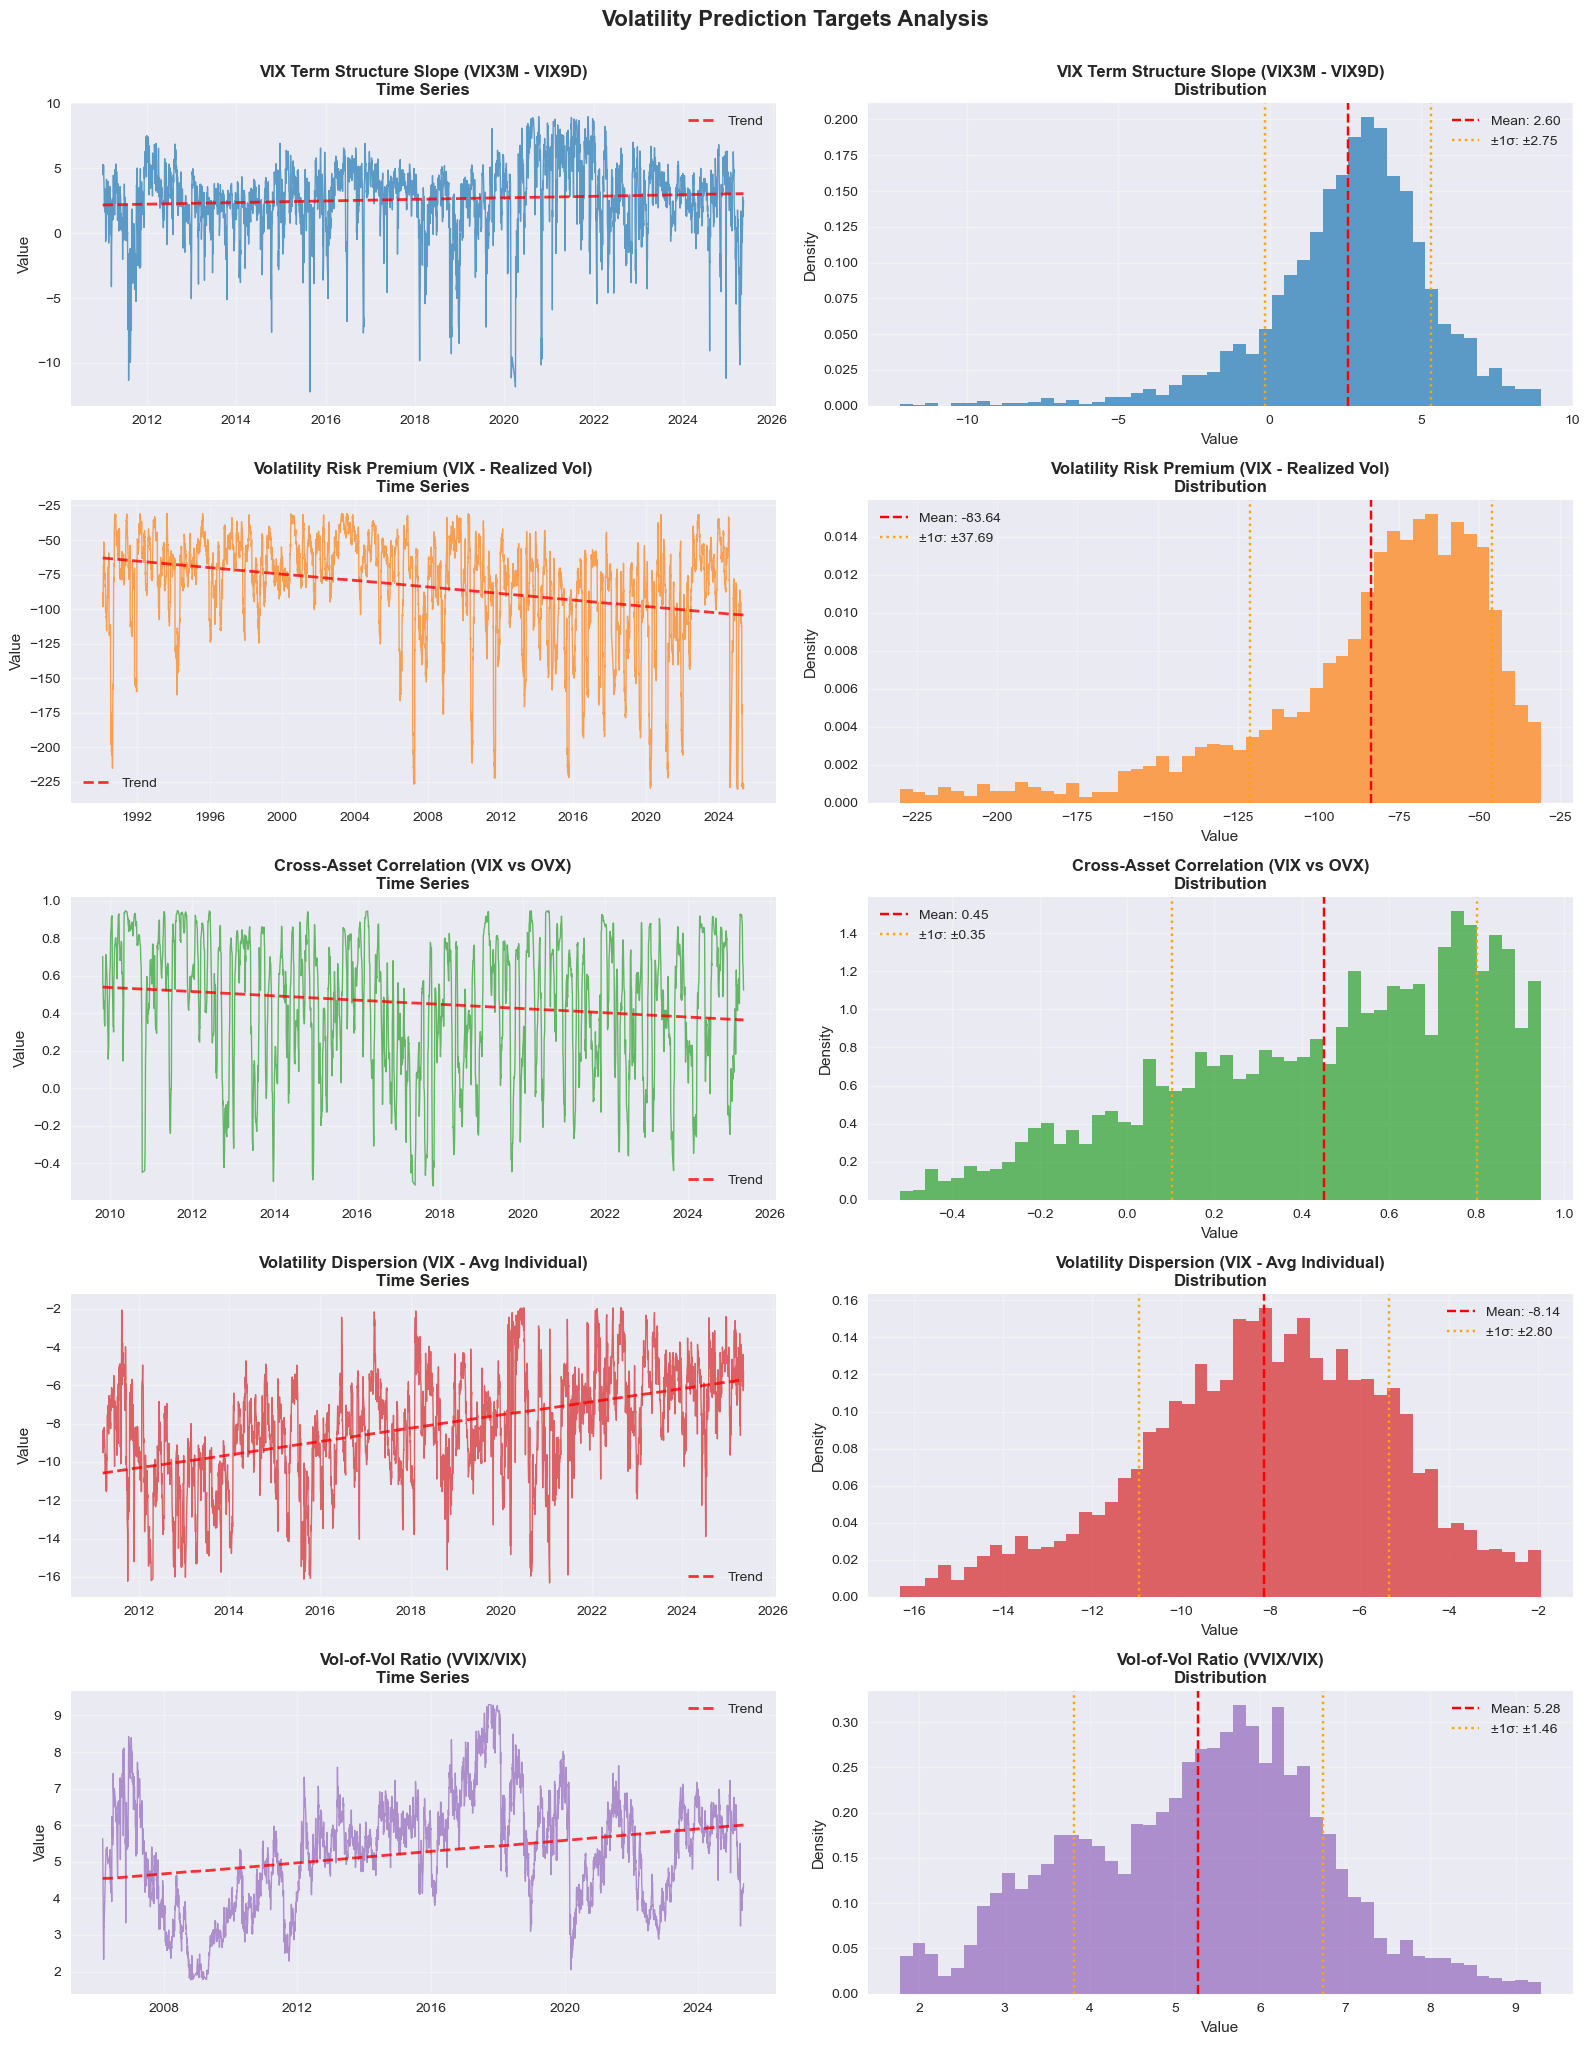


VOLATILITY PREDICTION TARGETS SUMMARY

📊 Term Structure Slope
   • Observations: 3,609
   • Period: 2011-01-04 to 2025-05-09
   • Mean ± Std: 2.424 ± 3.799
   • Range: [-46.320, 12.490]
   • Skewness: -3.650
   • Trend Slope: 0.000217

📊 Vol Risk Premium
   • Observations: 8,894
   • Period: 1990-02-13 to 2025-05-09
   • Mean ± Std: -85.040 ± 42.908
   • Range: [-376.075, -14.417]
   • Skewness: -2.041
   • Trend Slope: -0.005644

📊 Cross Asset Correlation
   • Observations: 3,902
   • Period: 2009-10-29 to 2025-05-09
   • Mean ± Std: 0.446 ± 0.366
   • Range: [-0.757, 0.971]
   • Skewness: -0.710
   • Trend Slope: -0.000042

📊 Volatility Dispersion
   • Observations: 3,556
   • Period: 2011-03-16 to 2025-05-09
   • Mean ± Std: -8.160 ± 3.044
   • Range: [-25.595, 6.610]
   • Skewness: -0.373
   • Trend Slope: 0.001490

📊 Vol Of Vol Ratio
   • Observations: 4,766
   • Period: 2006-03-06 to 2025-05-09
   • Mean ± Std: 5.283 ± 1.559
   • Range: [1.319, 10.317]
   • Skewness: 0.003
   • 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class VolatilityTargetAnalyzer:
    def __init__(self, data_path="data/volatility/"):
        self.data_path = Path(data_path)
        self.data = {}
        
    def load_cboe_data(self):
        """Load all available CBOE data files"""
        print("Loading CBOE data files...")
        
        # Define file mappings
        file_mappings = {
            'VIX': 'VIX_History.csv',
            'VIX9D': 'VIX9D_History.csv', 
            'VIX3M': 'VIX3M_History.csv',
            'VVIX': 'VVIX_History.csv',
            'OVX': 'OVX_History.csv',
            'GVZ': 'GVZ_History.csv',
            'VXAPL': 'VXAPL_History.csv',
            'VXEEM': 'VXEEM_History.csv',
            'VAZN': 'VAZN_History.csv'
        }
        
        for name, filename in file_mappings.items():
            filepath = self.data_path / filename
            if filepath.exists():
                try:
                    df = pd.read_csv(filepath)
                    df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')
                    df = df.set_index('DATE').sort_index()
                    
                    # Handle different data formats
                    if name in ['VVIX', 'OVX', 'GVZ']:
                        # Single value format
                        if name == 'VVIX':
                            df = df.rename(columns={'VVIX': 'CLOSE'})
                        elif name == 'OVX':
                            df = df.rename(columns={'OVX': 'CLOSE'})
                        elif name == 'GVZ':
                            df = df.rename(columns={'GVZ': 'CLOSE'})
                    
                    # Store closing prices
                    self.data[name] = df['CLOSE']
                    print(f"  ✓ Loaded {name}: {len(df)} observations from {df.index.min()} to {df.index.max()}")
                    
                except Exception as e:
                    print(f"  ✗ Error loading {name}: {e}")
            else:
                print(f"  ✗ File not found: {filename}")
        
        return self.data
    
    def create_target_variables(self):
        """Create the 5 target variables for prediction"""
        print("\nCreating target variables...")
        targets = {}
        
        # 1. VIX Term Structure Slope (VIX3M - VIX9D)
        if 'VIX3M' in self.data and 'VIX9D' in self.data:
            # Align dates
            common_dates = self.data['VIX3M'].index.intersection(self.data['VIX9D'].index)
            if len(common_dates) > 0:
                targets['term_structure_slope'] = (
                    self.data['VIX3M'].loc[common_dates] - self.data['VIX9D'].loc[common_dates]
                )
                print(f"  ✓ Term Structure Slope: {len(targets['term_structure_slope'])} observations")
            else:
                print("  ✗ No overlapping dates for VIX3M and VIX9D")
        else:
            print("  ✗ Missing VIX3M or VIX9D for term structure slope")
        
        # 2. Realized vs Implied Volatility Spread (VIX - Realized Vol)
        # We'll approximate realized vol using VIX daily changes
        if 'VIX' in self.data:
            vix_series = self.data['VIX'].dropna()
            # Calculate 30-day realized volatility (annualized)
            vix_returns = vix_series.pct_change().dropna()
            realized_vol = vix_returns.rolling(30).std() * np.sqrt(252) * 100  # Annualized %
            
            # Align with VIX levels
            common_dates = vix_series.index.intersection(realized_vol.index)
            if len(common_dates) > 0:
                targets['vol_risk_premium'] = (
                    vix_series.loc[common_dates] - realized_vol.loc[common_dates]
                )
                print(f"  ✓ Vol Risk Premium: {len(targets['vol_risk_premium'])} observations")
            else:
                print("  ✗ Cannot create vol risk premium")
        else:
            print("  ✗ Missing VIX for vol risk premium")
        
        # 3. Cross-Asset Volatility Correlation (VIX vs OVX rolling correlation)
        if 'VIX' in self.data and 'OVX' in self.data:
            common_dates = self.data['VIX'].index.intersection(self.data['OVX'].index)
            if len(common_dates) > 60:  # Need enough data for correlation
                vix_aligned = self.data['VIX'].loc[common_dates]
                ovx_aligned = self.data['OVX'].loc[common_dates]
                
                targets['cross_asset_correlation'] = vix_aligned.rolling(30).corr(ovx_aligned)
                print(f"  ✓ Cross-Asset Correlation: {len(targets['cross_asset_correlation'])} observations")
            else:
                print("  ✗ Insufficient overlapping data for VIX-OVX correlation")
        else:
            print("  ✗ Missing VIX or OVX for cross-asset correlation")
        
        # 4. Volatility Dispersion (VIX - Average Individual Vol)
        individual_vols = ['VXAPL', 'VXEEM', 'VAZN']
        available_individual = [vol for vol in individual_vols if vol in self.data]
        
        if 'VIX' in self.data and len(available_individual) >= 2:
            # Find common dates across all available individual vols and VIX
            common_dates = self.data['VIX'].index
            for vol_name in available_individual:
                common_dates = common_dates.intersection(self.data[vol_name].index)
            
            if len(common_dates) > 0:
                # Calculate average individual volatility
                individual_vol_data = pd.DataFrame({
                    vol: self.data[vol].loc[common_dates] for vol in available_individual
                })
                avg_individual_vol = individual_vol_data.mean(axis=1)
                
                targets['volatility_dispersion'] = (
                    self.data['VIX'].loc[common_dates] - avg_individual_vol
                )
                print(f"  ✓ Volatility Dispersion: {len(targets['volatility_dispersion'])} observations using {available_individual}")
            else:
                print("  ✗ No common dates for volatility dispersion")
        else:
            print(f"  ✗ Missing VIX or insufficient individual vols (have: {available_individual})")
        
        # 5. Vol-of-Vol Ratio (VVIX/VIX)
        if 'VVIX' in self.data and 'VIX' in self.data:
            common_dates = self.data['VVIX'].index.intersection(self.data['VIX'].index)
            if len(common_dates) > 0:
                targets['vol_of_vol_ratio'] = (
                    self.data['VVIX'].loc[common_dates] / self.data['VIX'].loc[common_dates]
                )
                print(f"  ✓ Vol-of-Vol Ratio: {len(targets['vol_of_vol_ratio'])} observations")
            else:
                print("  ✗ No overlapping dates for VVIX and VIX")
        else:
            print("  ✗ Missing VVIX or VIX for vol-of-vol ratio")
        
        return targets
    
    def plot_target_analysis(self, targets):
        """Create comprehensive visualization of all target variables"""
        available_targets = {k: v for k, v in targets.items() if v is not None and len(v) > 0}
        n_targets = len(available_targets)
        
        if n_targets == 0:
            print("No targets available for plotting!")
            return
        
        # Create figure with subplots
        fig, axes = plt.subplots(n_targets, 2, figsize=(16, 4*n_targets))
        if n_targets == 1:
            axes = axes.reshape(1, -1)
        
        target_descriptions = {
            'term_structure_slope': 'VIX Term Structure Slope (VIX3M - VIX9D)',
            'vol_risk_premium': 'Volatility Risk Premium (VIX - Realized Vol)',
            'cross_asset_correlation': 'Cross-Asset Correlation (VIX vs OVX)',
            'volatility_dispersion': 'Volatility Dispersion (VIX - Avg Individual)',
            'vol_of_vol_ratio': 'Vol-of-Vol Ratio (VVIX/VIX)'
        }
        
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
        
        for i, (target_name, target_data) in enumerate(available_targets.items()):
            color = colors[i % len(colors)]
            
            # Remove outliers for better visualization
            target_clean = target_data.dropna()
            q1, q99 = target_clean.quantile([0.01, 0.99])
            target_clean = target_clean[(target_clean >= q1) & (target_clean <= q99)]
            
            # Time series plot
            axes[i, 0].plot(target_clean.index, target_clean.values, 
                           color=color, alpha=0.7, linewidth=1)
            axes[i, 0].set_title(f'{target_descriptions[target_name]}\nTime Series', 
                                fontsize=12, fontweight='bold')
            axes[i, 0].set_ylabel('Value')
            axes[i, 0].grid(True, alpha=0.3)
            
            # Add trend line
            if len(target_clean) > 100:
                z = np.polyfit(range(len(target_clean)), target_clean.values, 1)
                p = np.poly1d(z)
                axes[i, 0].plot(target_clean.index, p(range(len(target_clean))), 
                               "r--", alpha=0.8, linewidth=2, label=f'Trend')
                axes[i, 0].legend()
            
            # Distribution plot
            axes[i, 1].hist(target_clean.values, bins=50, color=color, alpha=0.7, density=True)
            axes[i, 1].set_title(f'{target_descriptions[target_name]}\nDistribution', 
                                fontsize=12, fontweight='bold')
            axes[i, 1].set_xlabel('Value')
            axes[i, 1].set_ylabel('Density')
            axes[i, 1].grid(True, alpha=0.3)
            
            # Add statistics
            mean_val = target_clean.mean()
            std_val = target_clean.std()
            axes[i, 1].axvline(mean_val, color='red', linestyle='--', 
                              label=f'Mean: {mean_val:.2f}')
            axes[i, 1].axvline(mean_val + std_val, color='orange', linestyle=':', 
                              label=f'±1σ: ±{std_val:.2f}')
            axes[i, 1].axvline(mean_val - std_val, color='orange', linestyle=':')
            axes[i, 1].legend()
        
        plt.tight_layout()
        plt.suptitle('Volatility Prediction Targets Analysis', 
                     fontsize=16, fontweight='bold', y=1.02)
        plt.show()
        
        return fig
    
    def create_summary_statistics(self, targets):
        """Create summary statistics table"""
        print("\n" + "="*80)
        print("VOLATILITY PREDICTION TARGETS SUMMARY")
        print("="*80)
        
        summary_data = []
        
        for target_name, target_data in targets.items():
            if target_data is not None and len(target_data) > 0:
                target_clean = target_data.dropna()
                
                if len(target_clean) > 0:
                    # Calculate statistics
                    stats = {
                        'Target': target_name.replace('_', ' ').title(),
                        'Observations': len(target_clean),
                        'Start Date': target_clean.index.min().strftime('%Y-%m-%d'),
                        'End Date': target_clean.index.max().strftime('%Y-%m-%d'),
                        'Mean': target_clean.mean(),
                        'Std Dev': target_clean.std(),
                        'Min': target_clean.min(),
                        'Max': target_clean.max(),
                        'Skewness': target_clean.skew(),
                        'Trend Slope': np.polyfit(range(len(target_clean)), target_clean.values, 1)[0] if len(target_clean) > 1 else 0
                    }
                    summary_data.append(stats)
        
        if summary_data:
            summary_df = pd.DataFrame(summary_data)
            
            # Display formatted table
            for _, row in summary_df.iterrows():
                print(f"\n📊 {row['Target']}")
                print(f"   • Observations: {row['Observations']:,}")
                print(f"   • Period: {row['Start Date']} to {row['End Date']}")
                print(f"   • Mean ± Std: {row['Mean']:.3f} ± {row['Std Dev']:.3f}")
                print(f"   • Range: [{row['Min']:.3f}, {row['Max']:.3f}]")
                print(f"   • Skewness: {row['Skewness']:.3f}")
                print(f"   • Trend Slope: {row['Trend Slope']:.6f}")
        
        return summary_data
    
    def analyze_prediction_viability(self, targets):
        """Analyze which targets are most suitable for prediction"""
        print("\n" + "="*80)
        print("PREDICTION VIABILITY ANALYSIS")
        print("="*80)
        
        viability_scores = {}
        
        for target_name, target_data in targets.items():
            if target_data is None or len(target_data) == 0:
                continue
                
            target_clean = target_data.dropna()
            if len(target_clean) < 100:  # Need minimum data
                continue
            
            # Calculate viability metrics
            score = 0
            reasons = []
            
            # 1. Data availability (30% weight)
            data_score = min(len(target_clean) / 1000, 1.0) * 30
            score += data_score
            reasons.append(f"Data: {len(target_clean):,} obs ({data_score:.1f}/30)")
            
            # 2. Trend strength (25% weight)
            if len(target_clean) > 100:
                trend_slope = abs(np.polyfit(range(len(target_clean)), target_clean.values, 1)[0])
                trend_score = min(trend_slope * 1000, 1.0) * 25  # Scale trend
                score += trend_score
                reasons.append(f"Trend: {trend_slope:.6f} ({trend_score:.1f}/25)")
            
            # 3. Stationarity check (20% weight)
            # Simple stationarity proxy: coefficient of variation
            cv = target_clean.std() / abs(target_clean.mean()) if target_clean.mean() != 0 else float('inf')
            stationarity_score = min(2.0 / (cv + 0.1), 1.0) * 20
            score += stationarity_score
            reasons.append(f"Stability: CV={cv:.2f} ({stationarity_score:.1f}/20)")
            
            # 4. Regime structure (15% weight)
            # Check for clear regime changes using rolling statistics
            rolling_mean = target_clean.rolling(60).mean()
            regime_changes = abs(rolling_mean.diff()).sum()
            regime_score = min(regime_changes / len(target_clean) * 100, 1.0) * 15
            score += regime_score
            reasons.append(f"Regimes: {regime_changes/len(target_clean)*100:.3f} ({regime_score:.1f}/15)")
            
            # 5. Predictability proxy (10% weight)
            # Autocorrelation at lag 1
            autocorr = target_clean.autocorr() if len(target_clean) > 1 else 0
            predict_score = abs(autocorr) * 10
            score += predict_score
            reasons.append(f"Autocorr: {autocorr:.3f} ({predict_score:.1f}/10)")
            
            viability_scores[target_name] = {
                'total_score': score,
                'reasons': reasons,
                'recommendation': 'High' if score > 70 else 'Medium' if score > 50 else 'Low'
            }
        
        # Sort by score
        sorted_targets = sorted(viability_scores.items(), key=lambda x: x[1]['total_score'], reverse=True)
        
        print("\n🏆 PREDICTION TARGET RANKINGS:")
        for i, (target_name, metrics) in enumerate(sorted_targets, 1):
            recommendation = metrics['recommendation']
            emoji = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else "📊"
            
            print(f"\n{emoji} #{i}: {target_name.replace('_', ' ').title()}")
            print(f"   📈 Viability Score: {metrics['total_score']:.1f}/100 ({recommendation})")
            for reason in metrics['reasons']:
                print(f"      • {reason}")
        
        return viability_scores

# Run the complete analysis
def main():
    print("🎯 VOLATILITY PREDICTION TARGETS ANALYSIS")
    print("="*60)
    
    # Initialize analyzer
    analyzer = VolatilityTargetAnalyzer()
    
    # Load data
    data = analyzer.load_cboe_data()
    
    if not data:
        print("❌ No data loaded! Check your file paths.")
        return
    
    # Create targets
    # Create targets
    targets = analyzer.create_target_variables()

    # Fix: Check if targets contain valid data (not None and not empty)
    valid_targets = [t for t in targets.values() if t is not None and len(t) > 0]
    if not valid_targets:
        print("❌ No valid targets created!")
        return
    
    # Create visualizations
    analyzer.plot_target_analysis(targets)
    
    # Generate summary statistics
    summary = analyzer.create_summary_statistics(targets)
    
    # Analyze prediction viability
    viability = analyzer.analyze_prediction_viability(targets)
    
    print(f"\n🎉 Analysis complete! Found {len([t for t in targets.values() if t is not None])} viable prediction targets.")

# Run the analysis
main()